In [2]:
pip install matplotlib==3.7.3

Note: you may need to restart the kernel to use updated packages.


In [76]:
import warnings
warnings.filterwarnings('ignore')

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import openpyxl
import numpy as np
import joblib
from sklearn.metrics import r2_score

In [79]:
# Obteniendo Región, Tipo de delito y número de delitos, hoja comauto y resumen por Región
import pandas as pd
import openpyxl

def process_excel(file_path,sheetname):
    wb = openpyxl.load_workbook(file_path)
    sheet = sheet = wb[sheetname]  

    data = []
    actual_region_tipo = None
    encontrado_region_tipo = False 

    for row in range(8, sheet.max_row + 1): 
        cell_a_value = sheet.cell(row=row, column=1).value
        
        # Detectar si la fila representa un tipo de delito. 

        if not encontrado_region_tipo or (cell_a_value != None and sheet.cell(row=row, column=2).value == None):
            actual_region_tipo = cell_a_value
            encontrado_region_tipo = True  
            continue 
        
        # Después de un tipo de delito, las filas siguientes son de edad hasta el siguiente tipo de delito.

        if cell_a_value and encontrado_region_tipo:
            sexo = cell_a_value  
            for col in range(2, sheet.max_column + 1): 
                año = sheet.cell(row=7, column=col).value 
                value = sheet.cell(row=row, column=col).value
                if value != None:
                    data.append([actual_region_tipo, sexo, año, value])
            continue
        
        # Restablecer la bandera si esta fila está vacía 
        if cell_a_value == None:
            encontrado_region_tipo = False

    df = pd.DataFrame(data, columns=['Region', 'tipo_de_delito', 'año', 'Value'])
    return df
# Ruta al archivo Excel que ha cargado
file_path = r'control sheet.xlsx'

# Procesar el fichero Excel e imprimir el DataFrame
df = process_excel(file_path,'comauto')
df.columns = df.columns.str.replace(' ', '_', regex=False)

df['Region'] = df['Region'].str.strip()
df['Region'] = df['Region'].apply(lambda x: ' '.join(x.split(' ')[1:]))
df['Region'] = df['Region'].str.strip()
df = df[df['Region'] != 'Nacional']

df['tipo_de_delito'] = df['tipo_de_delito'].str.strip()
df['tipo_de_delito'] = df['tipo_de_delito'].apply(lambda x: ' '.join(x.split(' ')[1:]))
df['tipo_de_delito'] = df['tipo_de_delito'].str.strip()
df = df[df['tipo_de_delito'] != 'Total Delitos']
df_region_delito = df
df_grouped_region = df_region_delito.groupby(['Region', 'año'])['Value'].sum().reset_index(name='total_region_delito')
df_grouped_region

Region   año  total_region_delito
0    Andalucía  2013                54881
1    Andalucía  2014                53536
2    Andalucía  2015                55998
3    Andalucía  2016                70693
4    Andalucía  2017                76097
..         ...   ...                  ...
185  Rioja, La  2018                 2734
186  Rioja, La  2019                 2439
187  Rioja, La  2020                 1911
188  Rioja, La  2021                 2971
189  Rioja, La  2022                 3095

[190 rows x 3 columns]

In [80]:
# Obteniendo la población total de la hoja 'poblacion' y fusionándola con el resultado anterior"
import pandas as pd
import openpyxl

def process_excel(file_path,sheetname):
    wb = openpyxl.load_workbook(file_path)
    sheet = sheet = wb[sheetname]  

    data = []
    género = None
    género_tipo = False 

    for row in range(9, sheet.max_row + 1): 
        cell_a_value = sheet.cell(row=row, column=1).value
        
        # Detectar si la fila representa genero 

        if not género_tipo or (cell_a_value != None and sheet.cell(row=row, column=2).value == None):
            género = cell_a_value
            género_tipo = True  
            continue 
        

        if cell_a_value and género_tipo:
            Region = cell_a_value  
            for col in range(2, sheet.max_column + 1): 
                año = sheet.cell(row=8, column=col).value 
                edad = sheet.cell(row=7, column=col).value 
                value = sheet.cell(row=row, column=col).value
                if value != None:
                    data.append([género,Region, edad, año, value])
            continue
        
        # Restablecer la bandera si esta fila está vacía y estamos entre los tipos de delito
        if cell_a_value == None:
            género_tipo = False

    df = pd.DataFrame(data, columns=['género','Region', 'edad', 'año', 'Value'])
    return df
# Ruta al archivo Excel que ha cargado
file_path = r'control sheet.xlsx'

# Procesar el fichero Excel e imprimir el DataFrame
df = process_excel(file_path,'poblacion')
df.columns = df.columns.str.replace(' ', '_', regex=False)
#df = df[df['Region'] != 'Total Nacional']
df['Region'] = df['Region'].str.strip()
df['Region'] = df['Region'].apply(lambda x: ' '.join(x.split(' ')[1:]))
df['Region'] = df['Region'].str.strip()
df['género'] = df['género'].str.strip()
#df['tipo_de_delito'] = df['tipo_de_delito'].apply(lambda x: ' '.join(x.split(' ')[1:]))
#df['tipo_de_delito'] = df['tipo_de_delito'].str.strip()

#df = df[df['tipo_de_delito'] != 'Total Delitos']

df_region_género_edad = df
df_grouped_region_pob = df_region_género_edad[df_region_género_edad['género'] == 'Ambos sexos']
df_grouped_region_pob = df_grouped_region_pob[df_grouped_region_pob['Region'] != 'TOTAL']
df_grouped_region_pob = df_grouped_region_pob[df_grouped_region_pob['Region'] != '']
df_grouped_region_pob['Value']   = df_grouped_region_pob['Value']  * 1000
df_grouped_region_pob = df_grouped_region_pob.groupby(['Region', 'año'])['Value'].sum().reset_index(name='total_region')
merged_grouped_region_pob = pd.merge(df_grouped_region, df_grouped_region_pob, on=['Region','año'])
merged_grouped_region_pob['perc_delito'] = ( merged_grouped_region_pob['total_region_delito']/merged_grouped_region_pob['total_region'] ) * 100
merged_grouped_region_pob


Region   año  total_region_delito total_region perc_delito
0    Andalucía  2013                54881    6856500.0    0.800423
1    Andalucía  2014                53536    6864900.0    0.779851
2    Andalucía  2015                55998    6879300.0    0.814007
3    Andalucía  2016                70693    6891100.0    1.025859
4    Andalucía  2017                76097    5515900.0    1.379594
..         ...   ...                  ...          ...         ...
185  Rioja, La  2018                 2734     260500.0     1.04952
186  Rioja, La  2019                 2439     262500.0    0.929143
187  Rioja, La  2020                 1911     264600.0    0.722222
188  Rioja, La  2021                 2971     264300.0    1.124101
189  Rioja, La  2022                 3095     264800.0    1.168807

[190 rows x 5 columns]

In [81]:
# Obteniendo la pobreza total de la hoja 'pobreza' y fusionándola con el resultado anterior"
import pandas as pd
import openpyxl

def process_excel(file_path,sheetname):
    wb = openpyxl.load_workbook(file_path)
    sheet = sheet = wb[sheetname]  

    data = []

    for row in range(9, sheet.max_row + 1): 
        cell_a_value = sheet.cell(row=row, column=1).value
        
        # la nueva celda representa la región

        if cell_a_value:
            Region = cell_a_value  
            for col in range(2, sheet.max_column + 1): 
                año = sheet.cell(row=8, column=col).value 
                value = sheet.cell(row=row, column=col).value
                if value != None:
                    data.append([Region, año, value])
            continue
        
        # Restablecer la bandera si esta fila está vacía y estamos entre los tipos de delito


    df = pd.DataFrame(data, columns=['Region',  'año', 'Value'])
    return df
# Ruta al archivo Excel que ha cargado
file_path = r'control sheet.xlsx'

# Procesar el fichero Excel e imprimir el DataFrame
df = process_excel(file_path,'pobreza')
df.columns = df.columns.str.replace(' ', '_', regex=False)

df['Region'] = df['Region'].apply(lambda x: ' '.join(x.split(' ')[1:]))
df['Region'] = df['Region'].str.strip()
df = df[df['Region'] != 'Nacional']
#df['género'] = df['género'].str.strip()
#df['tipo_de_delito'] = df['tipo_de_delito'].apply(lambda x: ' '.join(x.split(' ')[1:]))
#df['tipo_de_delito'] = df['tipo_de_delito'].str.strip()

#df = df[df['tipo_de_delito'] != 'Total Delitos']

df_region_pobreza = df
df_grouped_pobreza_pob = df_region_pobreza.groupby(['Region', 'año'])['Value'].sum().reset_index(name='total_region_pobreza')
merged_grouped_region_probeza = pd.merge(merged_grouped_region_pob, df_grouped_pobreza_pob, on=['Region','año'])
merged_grouped_region_probeza

Region   año  total_region_delito total_region perc_delito  \
0    Andalucía  2013                54881    6856500.0    0.800423   
1    Andalucía  2014                53536    6864900.0    0.779851   
2    Andalucía  2015                55998    6879300.0    0.814007   
3    Andalucía  2016                70693    6891100.0    1.025859   
4    Andalucía  2017                76097    5515900.0    1.379594   
..         ...   ...                  ...          ...         ...   
185  Rioja, La  2018                 2734     260500.0     1.04952   
186  Rioja, La  2019                 2439     262500.0    0.929143   
187  Rioja, La  2020                 1911     264600.0    0.722222   
188  Rioja, La  2021                 2971     264300.0    1.124101   
189  Rioja, La  2022                 3095     264800.0    1.168807   

     total_region_pobreza  
0                    29.1  
1                    33.3  
2                    35.7  
3                    35.4  
4                    31.0  
..                    ...  
185                  16.6  
186                  12.3  
187                  15.0  
188                  16.1  
189                  16.6  

[190 rows x 6 columns]

In [82]:
# Obteniendo la estudios total de la hoja 'estudios' y fusionándola con el resultado anterior"
import pandas as pd
import openpyxl

def process_excel(file_path,sheetname):
    wb = openpyxl.load_workbook(file_path)
    sheet = sheet = wb[sheetname]  

    data = []
    género = None
    género_tipo = False 

    for row in range(9, sheet.max_row + 1): 
        cell_a_value = sheet.cell(row=row, column=1).value
        
        # Detectar si la fila representa genero

        if not género_tipo or (cell_a_value != None and sheet.cell(row=row, column=2).value == None):
            género = cell_a_value
            género_tipo = True  
            continue 
        
        # Después de un tipo genero, las filas siguientes son región hasta el siguiente tipo genero.

        if cell_a_value and género_tipo:
            Region = cell_a_value  
            for col in range(2, sheet.max_column + 1): 
                año = sheet.cell(row=8, column=col).value[:-2] 
                estudios = sheet.cell(row=7, column=col).value 
                value = sheet.cell(row=row, column=col).value
                if value != None:
                    data.append([género,Region, estudios, año, value])
            continue
        
        # Restablecer la bandera si esta fila está vacía y estamos entre los tipos de delito
        if cell_a_value == None:
            género_tipo = False

    df = pd.DataFrame(data, columns=['género','Region', 'estudios', 'año', 'Value'])
    return df
# Ruta al archivo Excel que ha cargado
file_path = r'control sheet.xlsx'

# Process the Excel file and print the DataFrame
df = process_excel(file_path,'estudios')
df.columns = df.columns.str.replace(' ', '_', regex=False)
#df = df[df['Region'] != 'Total Nacional']
df['Region'] = df['Region'].str.strip()
df['Region'] = df['Region'].apply(lambda x: ' '.join(x.split(' ')[1:]))
df['Region'] = df['Region'].str.strip()
df['género'] = df['género'].str.strip()
#df['tipo_de_delito'] = df['tipo_de_delito'].apply(lambda x: ' '.join(x.split(' ')[1:]))
#df['tipo_de_delito'] = df['tipo_de_delito'].str.strip()

#df = df[df['tipo_de_delito'] != 'Total Delitos']

df_género_region_estudios = df
df_grouped_region_estudios = df_género_region_estudios[df_género_region_estudios['género'] == 'Ambos sexos both sex']
df_grouped_region_estudios = df_grouped_region_estudios[df_grouped_region_estudios['Region'] != 'Nacional']
df_grouped_region_estudios = df_grouped_region_estudios[df_grouped_region_estudios['Region'] != '']
df_grouped_region_estudios['Value']   = df_grouped_region_estudios['Value'] 
df_grouped_region_estudios = df_grouped_region_estudios.groupby(['género','Region','estudios', 'año'])['Value'].mean().reset_index(name='total_region_estudios')
df_grouped_region_estudios = df_grouped_region_estudios.groupby(['Region','estudios', 'año'])['total_region_estudios'].sum().reset_index(name='total_region_estudios_fin')


df_grouped_region_estudios = df_grouped_region_estudios.pivot(index=['Region','año'], columns='estudios', values='total_region_estudios_fin')
df_grouped_region_estudios.columns = [''.join(col).strip() for col in df_grouped_region_estudios.columns.values]

df_grouped_region_estudios.reset_index(inplace=True)
merged_grouped_region_estudios_temp = pd.merge(merged_grouped_region_probeza, df_grouped_region_estudios, on=['Region','año'])

# Paso de relleno para el año 2013 ya que falta , Usando 204 como base
merged_grouped_region_estudios_2014 = merged_grouped_region_estudios_temp[merged_grouped_region_estudios_temp['año'] == '2014'].copy()
merged_grouped_region_estudios_2014['año'] = '2013'
merged_grouped_region_estudios = pd.concat([merged_grouped_region_estudios_temp, merged_grouped_region_estudios_2014], ignore_index=True)
merged_grouped_region_estudios.sort_values(by='año', inplace=True)
merged_grouped_region_estudios


Region   año  total_region_delito total_region  \
189                    Rioja, La  2013                 1890     259900.0   
188                   País Vasco  2013                10538    1813900.0   
171                    Andalucía  2013                53536    6864900.0   
173      Asturias, Principado de  2013                 6196     920400.0   
174               Balears, Illes  2013                 9176     930100.0   
..                           ...   ...                  ...          ...   
53                     Cantabria  2022                 5530     500800.0   
161                   País Vasco  2022                21150    1838800.0   
152  Navarra, Comunidad Foral de  2022                 5515     547000.0   
26       Asturias, Principado de  2022                 8963     882400.0   
35                Balears, Illes  2022                12756    1037400.0   

    perc_delito  total_region_pobreza Analfabetos Educación primaria  \
189    0.727203                  16.2        0.65             19.575   
188    0.580958                  10.2       0.625              17.85   
171    0.779851                  33.3       3.775             14.625   
173    0.673186                  16.7        0.65               23.0   
174    0.986561                  17.9        1.85              11.75   
..          ...                   ...         ...                ...   
53     1.104233                  14.8       0.325              8.475   
161    1.150207                  12.2        0.35              10.45   
152    1.008227                  10.9       0.825             12.375   
26     1.015752                  20.1         0.7              8.925   
35     1.229612                  16.9         1.2             10.375   

    Educación superior Escuela Profesional Escuela Secundaria  \
189             28.825               8.525              26.05   
188             36.425               9.125             22.975   
171             21.775                7.25             31.125   
173             29.575                7.05             22.575   
174             22.775               6.875              34.35   
..                 ...                 ...                ...   
53               35.35               10.35              31.45   
161             44.325               9.575              20.95   
152               37.7                10.7             23.275   
26              33.325               9.175             31.875   
35                27.5               8.775             30.875   

    Estudios primarios incompletos Licenciado  
189                           3.55      12.85  
188                           2.35     10.625  
171                           9.85      11.65  
173                          4.875     12.275  
174                          6.925      15.45  
..                             ...        ...  
53                           0.825     13.225  
161                          2.125       12.3  
152                            2.2     12.925  
26                           2.425     13.575  
35                           3.325     17.975  

[190 rows x 13 columns]

In [83]:
# Obteniendo la genero total de la hoja 'genero' y fusionándola con el resultado anterior"
import pandas as pd
import openpyxl

def process_excel(file_path,sheetname):
    wb = openpyxl.load_workbook(file_path)
    sheet = sheet = wb[sheetname]  # Assumes the data is in the first sheet

    data = []
    region = None
    region_tipo = False 

    for row in range(8, sheet.max_row + 1): 
        cell_a_value = sheet.cell(row=row, column=1).value
        
        # Detecta si la fila representa un tipo de región. 

        if not region_tipo or (cell_a_value != None and sheet.cell(row=row, column=2).value == None):
            region = cell_a_value
            region_tipo = True  
            continue 
        
        # Después de un tipo de región, las filas siguientes son de género hasta el siguiente tipo de región.

        if cell_a_value and region_tipo:
            género = cell_a_value  
            for col in range(2, sheet.max_column + 1): 
                año = sheet.cell(row=7, column=col).value 
                value = sheet.cell(row=row, column=col).value
                if value != None:
                    data.append([region,género,  año, value])
            continue
        
        # Restablecer la bandera si esta fila está vacía 
        if cell_a_value == None:
            region_tipo = False

    df = pd.DataFrame(data, columns=['Region','género',  'año', 'Value'])
    return df
# Ruta al archivo Excel que ha cargado
file_path = r'control sheet.xlsx'

# Procesar el fichero Excel e imprimir el DataFrame
df = process_excel(file_path,'genero')
df.columns = df.columns.str.replace(' ', '_', regex=False)
#df = df[df['Region'] != 'Total Nacional']
df['Region'] = df['Region'].str.strip()
df['Region'] = df['Region'].apply(lambda x: ' '.join(x.split(' ')[1:]))
df['Region'] = df['Region'].str.strip()
df['género'] = df['género'].str.strip()
df = df[df['Region'] != 'Nacional']
#df['tipo_de_delito'] = df['tipo_de_delito'].apply(lambda x: ' '.join(x.split(' ')[1:]))
#df['tipo_de_delito'] = df['tipo_de_delito'].str.strip()

#df = df[df['tipo_de_delito'] != 'Total Delitos']

df_region_género = df
df_grouped_region_género_perc = df_region_género.pivot(index=['Region','año'], columns='género', values='Value')
df_grouped_region_género_perc.columns = [''.join(col).strip() for col in df_grouped_region_género_perc.columns.values]
df_grouped_region_género_perc.reset_index(inplace=True)
df_grouped_region_género_perc['hombres_ratio'] = df_grouped_region_género_perc['Hombres']/df_grouped_region_género_perc['Total']
df_grouped_region_género_perc['mujeres_ratio'] = df_grouped_region_género_perc['Mujeres']/df_grouped_region_género_perc['Total']
merged_grouped_region_género_perc = pd.merge(merged_grouped_region_estudios, df_grouped_region_género_perc, on=['Region','año'])
merged_grouped_region_género_perc['perc_hombres'] = ( merged_grouped_region_género_perc['hombres_ratio']* 100 ).round(2)
merged_grouped_region_género_perc['perc_mujeres'] = ( merged_grouped_region_género_perc['mujeres_ratio']* 100 ).round(2)

merged_grouped_region_género_perc

Region   año  total_region_delito total_region  \
0                      Rioja, La  2013                 1890     259900.0   
1                     País Vasco  2013                10538    1813900.0   
2                      Andalucía  2013                53536    6864900.0   
3        Asturias, Principado de  2013                 6196     920400.0   
4                 Balears, Illes  2013                 9176     930100.0   
..                           ...   ...                  ...          ...   
185                    Cantabria  2022                 5530     500800.0   
186                   País Vasco  2022                21150    1838800.0   
187  Navarra, Comunidad Foral de  2022                 5515     547000.0   
188      Asturias, Principado de  2022                 8963     882400.0   
189               Balears, Illes  2022                12756    1037400.0   

    perc_delito  total_region_pobreza Analfabetos Educación primaria  \
0      0.727203                  16.2        0.65             19.575   
1      0.580958                  10.2       0.625              17.85   
2      0.779851                  33.3       3.775             14.625   
3      0.673186                  16.7        0.65               23.0   
4      0.986561                  17.9        1.85              11.75   
..          ...                   ...         ...                ...   
185    1.104233                  14.8       0.325              8.475   
186    1.150207                  12.2        0.35              10.45   
187    1.008227                  10.9       0.825             12.375   
188    1.015752                  20.1         0.7              8.925   
189    1.229612                  16.9         1.2             10.375   

    Educación superior Escuela Profesional Escuela Secundaria  \
0               28.825               8.525              26.05   
1               36.425               9.125             22.975   
2               21.775                7.25             31.125   
3               29.575                7.05             22.575   
4               22.775               6.875              34.35   
..                 ...                 ...                ...   
185              35.35               10.35              31.45   
186             44.325               9.575              20.95   
187               37.7                10.7             23.275   
188             33.325               9.175             31.875   
189               27.5               8.775             30.875   

    Estudios primarios incompletos Licenciado  Hombres  Mujeres  Total  \
0                             3.55      12.85     1517      169   1686   
1                             2.35     10.625     9856     1113  10969   
2                             9.85      11.65    49060     5821  54881   
3                            4.875     12.275     5410      666   6076   
4                            6.925      15.45     7821     1097   8918   
..                             ...        ...      ...      ...    ...   
185                          0.825     13.225     4418     1112   5530   
186                          2.125       12.3    17346     3804  21150   
187                            2.2     12.925     4728      787   5515   
188                          2.425     13.575     7163     1800   8963   
189                          3.325     17.975    10436     2320  12756   

     hombres_ratio  mujeres_ratio  perc_hombres  perc_mujeres  
0         0.899763       0.100237         89.98         10.02  
1         0.898532       0.101468         89.85         10.15  
2         0.893934       0.106066         89.39         10.61  
3         0.890388       0.109612         89.04         10.96  
4         0.876990       0.123010         87.70         12.30  
..             ...            ...           ...           ...  
185       0.798915       0.201085         79.89         20.11  
186       0.820142       0.179858         82.01         17.99  
18

In [84]:
#creación del conjunto de resultados finales y exportación a excel
merged_grouped_region_género_perc.columns = merged_grouped_region_género_perc.columns.str.replace(' ', '_', regex=False)
final_df = merged_grouped_region_género_perc[['Region','año','perc_delito','perc_hombres','perc_mujeres','total_region_pobreza','Analfabetos',	'Educación_primaria',	'Educación_superior',	'Escuela_Profesional',	'Escuela_Secundaria',	'Estudios_primarios_incompletos',	'Licenciado'	]]
final_df.rename(columns={'total_region_pobreza': 'perc_pobreza'}, inplace=True)
columns_to_convert = ['perc_delito','perc_hombres','perc_mujeres','perc_pobreza','Analfabetos',	'Educación_primaria',	'Educación_superior',	'Escuela_Profesional',	'Escuela_Secundaria',	'Estudios_primarios_incompletos',	'Licenciado']
for column in columns_to_convert:
    final_df[column] = pd.to_numeric(final_df[column], errors='coerce')
final_df[columns_to_convert] = final_df[columns_to_convert].round(2)
file_path = r'Complete dataset final.xlsx'
final_df.to_excel(file_path, index=False, engine='openpyxl')
final_df 

Region   año  perc_delito  perc_hombres  \
0                      Rioja, La  2013         0.73         89.98   
1                     País Vasco  2013         0.58         89.85   
2                      Andalucía  2013         0.78         89.39   
3        Asturias, Principado de  2013         0.67         89.04   
4                 Balears, Illes  2013         0.99         87.70   
..                           ...   ...          ...           ...   
185                    Cantabria  2022         1.10         79.89   
186                   País Vasco  2022         1.15         82.01   
187  Navarra, Comunidad Foral de  2022         1.01         85.73   
188      Asturias, Principado de  2022         1.02         79.92   
189               Balears, Illes  2022         1.23         81.81   

     perc_mujeres  perc_pobreza  Analfabetos  Educación_primaria  \
0           10.02          16.2         0.65               19.58   
1           10.15          10.2         0.62               17.85   
2           10.61          33.3         3.78               14.62   
3           10.96          16.7         0.65               23.00   
4           12.30          17.9         1.85               11.75   
..            ...           ...          ...                 ...   
185         20.11          14.8         0.32                8.48   
186         17.99          12.2         0.35               10.45   
187         14.27          10.9         0.82               12.37   
188         20.08          20.1         0.70                8.93   
189         18.19          16.9         1.20               10.38   

     Educación_superior  Escuela_Profesional  Escuela_Secundaria  \
0                 28.83                 8.52               26.05   
1                 36.42                 9.12               22.98   
2                 21.78                 7.25               31.12   
3                 29.58                 7.05               22.58   
4                 22.78                 6.88               34.35   
..                  ...                  ...                 ...   
185               35.35                10.35               31.45   
186               44.32                 9.58               20.95   
187               37.70                10.70               23.28   
188               33.33                 9.18               31.88   
189               27.50                 8.77               30.88   

     Estudios_primarios_incompletos  Licenciado  
0                              3.55       12.85  
1                              2.35       10.62  
2                              9.85       11.65  
3                              4.88       12.28  
4                              6.92       15.45  
..                              ...         ...  
185                            0.82       13.22  
186                            2.12       12.30  
187                            2.20       12.92  
188                            2.42       13.58  
189                            3.32       17.98  

[190 rows x 13 columns]

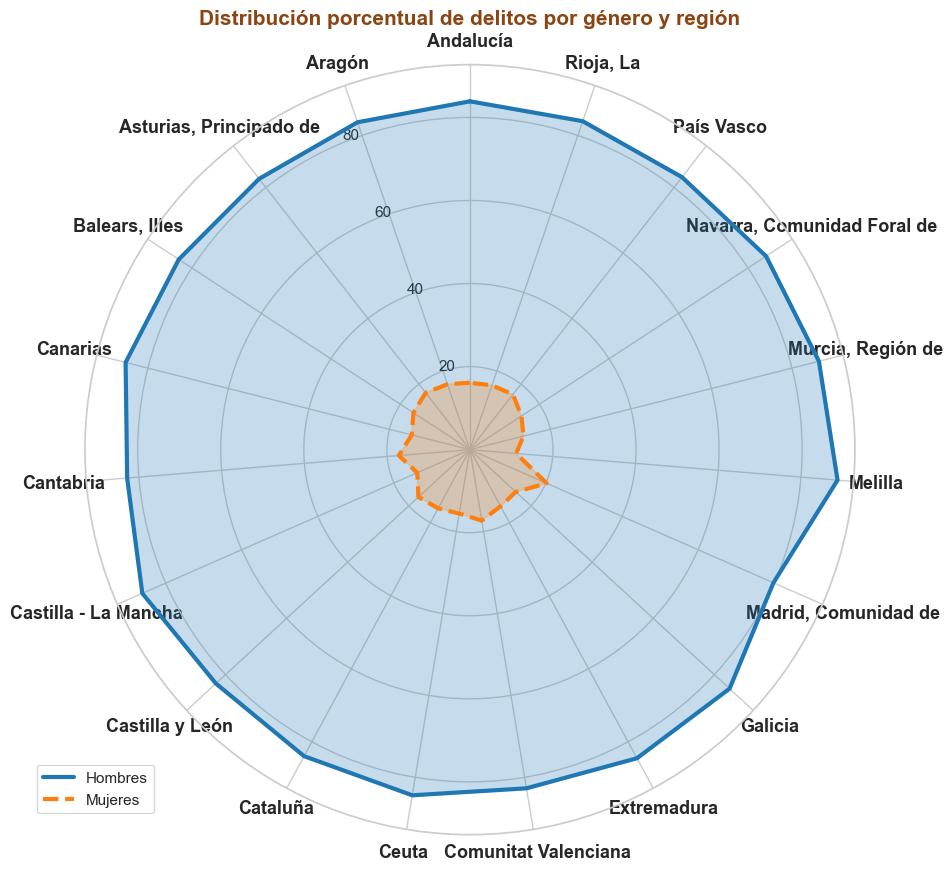

In [85]:
#plotting and analyzing genero statistics for region
from math import pi
df_filtered_summ = final_df
df_region_genero_stats = df_filtered_summ.groupby(['Region'])[['perc_hombres','perc_mujeres']].mean().reset_index()

# Variables setup
labels = df_region_genero_stats['Region'].unique()
num_vars = len(labels)

# Crear ángulos para el gráfico
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Opciones de color y estilo
colors = ['#1f77b4', '#ff7f0e']  
line_style = ['-', '--']  
gender_labels = ['Hombres', 'Mujeres'] 

# Plot datos de cada sexo
for idx, gender in enumerate(['perc_hombres', 'perc_mujeres']):
    values = df_region_genero_stats.groupby('Region')[gender].mean().tolist()
    values += values[:1]
    ax.plot(angles, values, color=colors[idx], linewidth=3, linestyle=line_style[idx], label=gender_labels[idx])
    ax.fill(angles, values, color=colors[idx], alpha=0.25)

# Mejorar la estética
ax.set_theta_offset(pi / 2) 
ax.set_xticks(angles[:-1])   
ax.set_xticklabels(labels, fontsize=13, fontweight='bold')  

# Añadir gridlines, labels, and legend
ax.grid(True)
ax.set_title('Distribución porcentual de delitos por género y región', size=15, color='saddlebrown', weight='bold')
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.show()

In [12]:
#No hay tanta variaciónn y, por tanto,, el resultadoo tendrá menos impacto enn funciónn del género.

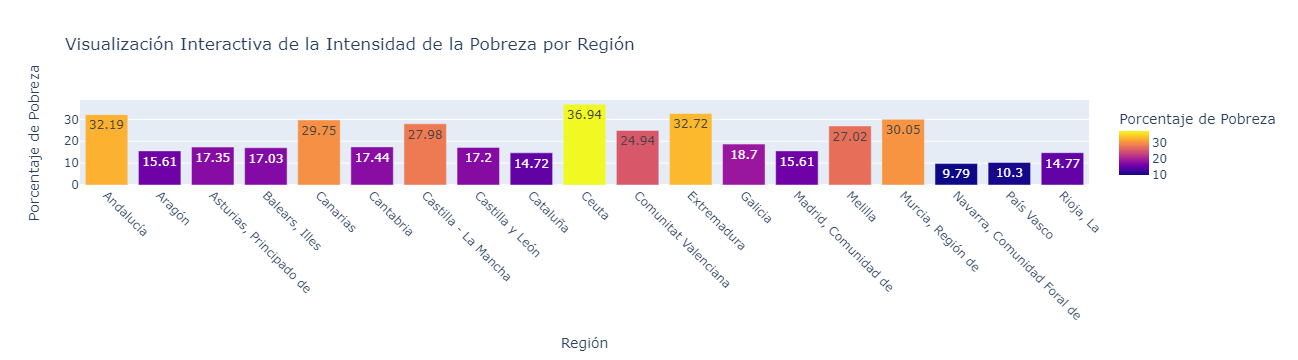

In [86]:
#plotting y analizar el porcentaje de pobreza por regiones
import plotly.express as px
df_region_pobreza_stats = df_filtered_summ.groupby(['Region'])[['perc_pobreza']].mean().reset_index()
df_region_pobreza_stats['perc_pobreza'] = df_region_pobreza_stats['perc_pobreza'].round(2)
size_scale = 30
df_region_pobreza_stats['normalized_size'] = (df_region_pobreza_stats['perc_pobreza'] - df_region_pobreza_stats['perc_pobreza'].min()) / (df_region_pobreza_stats['perc_pobreza'].max() - df_region_pobreza_stats['perc_pobreza'].min()) * size_scale + 5

# Uso Plotly Express para crear a bar chart
fig = px.bar(df_region_pobreza_stats, x='Region', y='perc_pobreza',
             text='perc_pobreza',  # Display percentage values on the bars
             color='perc_pobreza',  # Color the bars by poverty percentage
             color_continuous_scale='Plasma',  # Aesthetic choice for color scaling
             title='Visualización Interactiva de la Intensidad de la Pobreza por Región',
             labels={'perc_pobreza': 'Porcentaje de Pobreza', 'Region': 'Región'})

# Modifico x-axis para una mejor visibilidad del label
fig.update_xaxes(tickangle=45)
fig.show()

In [87]:
df_filtered_summ.dtypes

Region                             object
año                                object
perc_delito                       float64
perc_hombres                      float64
perc_mujeres                      float64
perc_pobreza                      float64
Analfabetos                       float64
Educación_primaria                float64
Educación_superior                float64
Escuela_Profesional               float64
Escuela_Secundaria                float64
Estudios_primarios_incompletos    float64
Licenciado                        float64
dtype: object

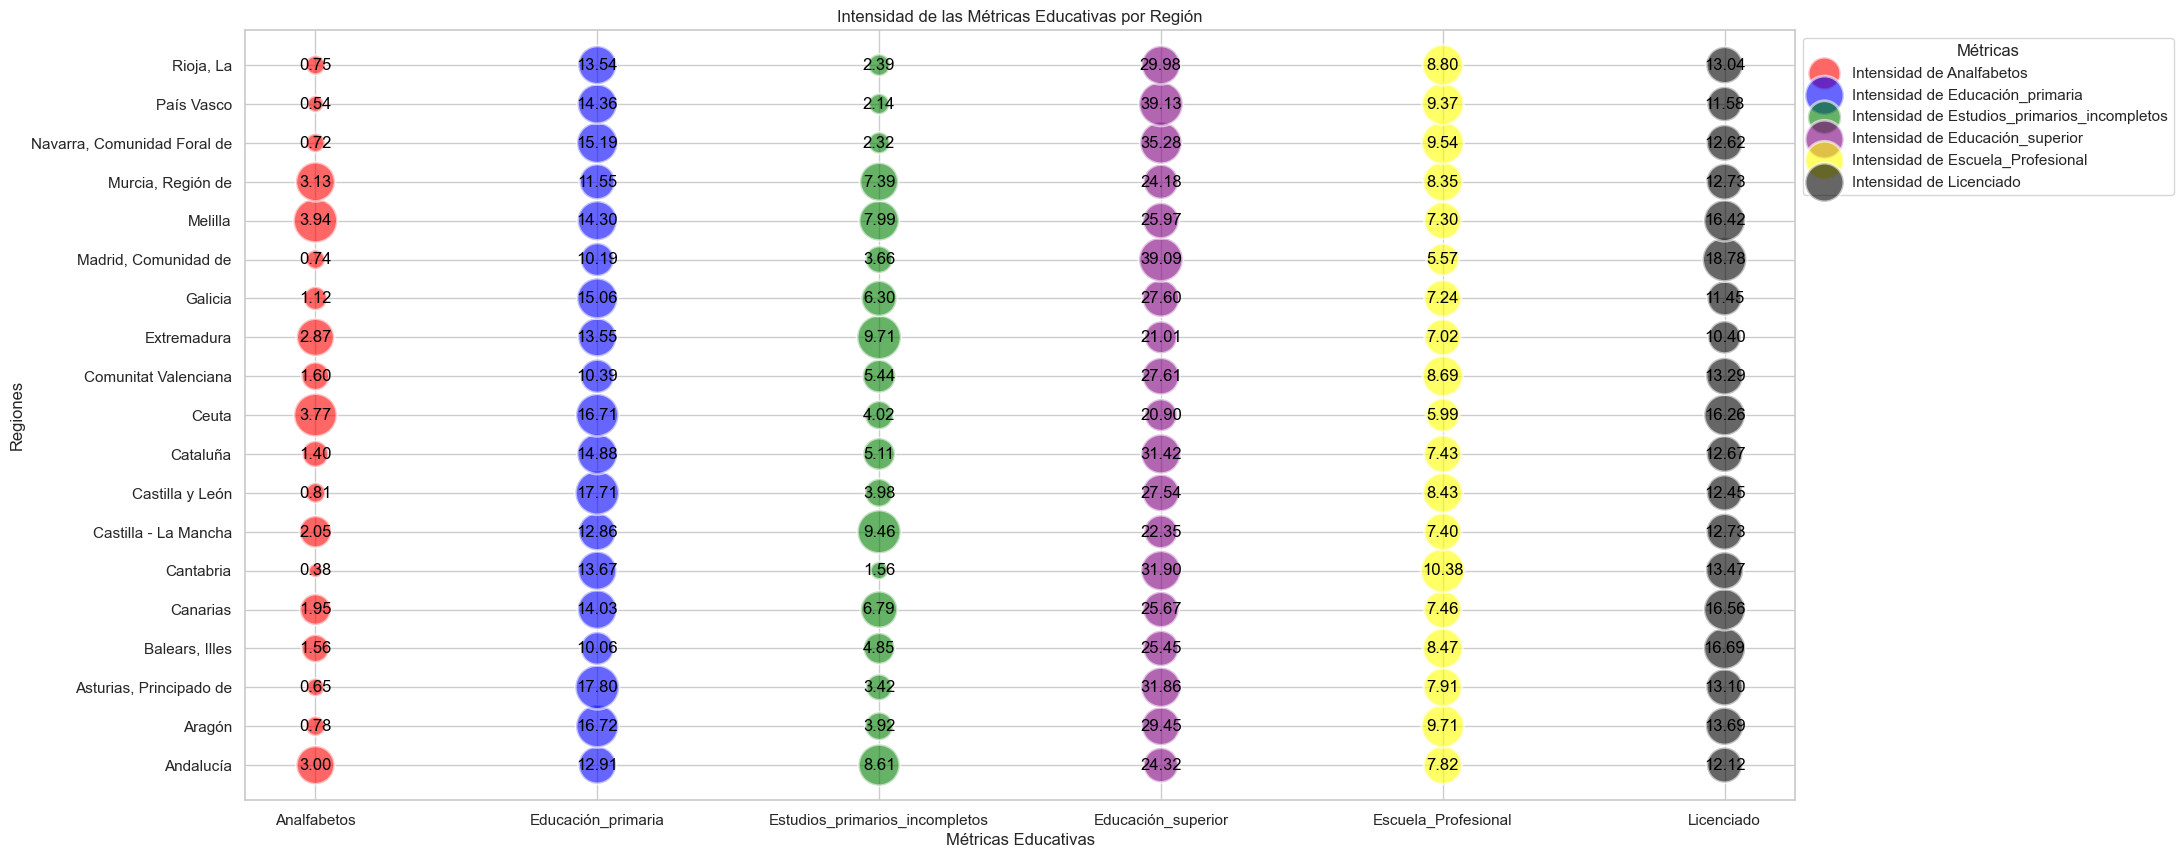

In [88]:
#plotting y analizar el porcentaje de estudios por región
df_region_estudios_stats = df_filtered_summ.groupby(['Region'])[['Analfabetos','Educación_primaria','Estudios_primarios_incompletos', 'Educación_superior', 'Escuela_Profesional', 'Licenciado']].mean().reset_index()

# Preparación de datos para el plotting
categories = ['Analfabetos','Educación_primaria','Estudios_primarios_incompletos', 'Educación_superior', 'Escuela_Profesional', 'Licenciado']
colors = ['red', 'blue', 'green', 'purple','yellow','black']  # Colors for each category
y_positions = np.arange(len(df_region_estudios_stats['Region']))  # Y positions for each region

# Crear el plot
plt.figure(figsize=(20, 10))  # Increased figure size for better readability
for i, category in enumerate(categories):
    normalized_sizes = df_region_estudios_stats[category.replace(' ', '_')] / df_region_estudios_stats[category.replace(' ', '_')].max() * 1000  # Normalize and scale sizes
    scatter = plt.scatter([category] * len(df_region_estudios_stats), y_positions, s=normalized_sizes,
                          color=colors[i], alpha=0.6, edgecolors='w', linewidth=2, label=f'Intensidad de {category}')
    for j, value in enumerate(df_region_estudios_stats[category.replace(' ', '_')]):
        plt.text(category, y_positions[j], f'{value:.2f}', color='black', ha='center', va='center')

plt.yticks(y_positions, df_region_estudios_stats['Region'])
plt.title('Intensidad de las Métricas Educativas por Región')
plt.xlabel('Métricas Educativas')
plt.ylabel('Regiones')

# Your plot code here
plt.legend(title="Métricas", loc = 'upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

In [24]:
#Sólo Analfabetos muestra una buena correlación basada en el scatter plot 

In [89]:
pip uninstall seaborn -y

Found existing installation: seaborn 0.13.2
Uninstalling seaborn-0.13.2:
  Successfully uninstalled seaborn-0.13.2
Note: you may need to restart the kernel to use updated packages.


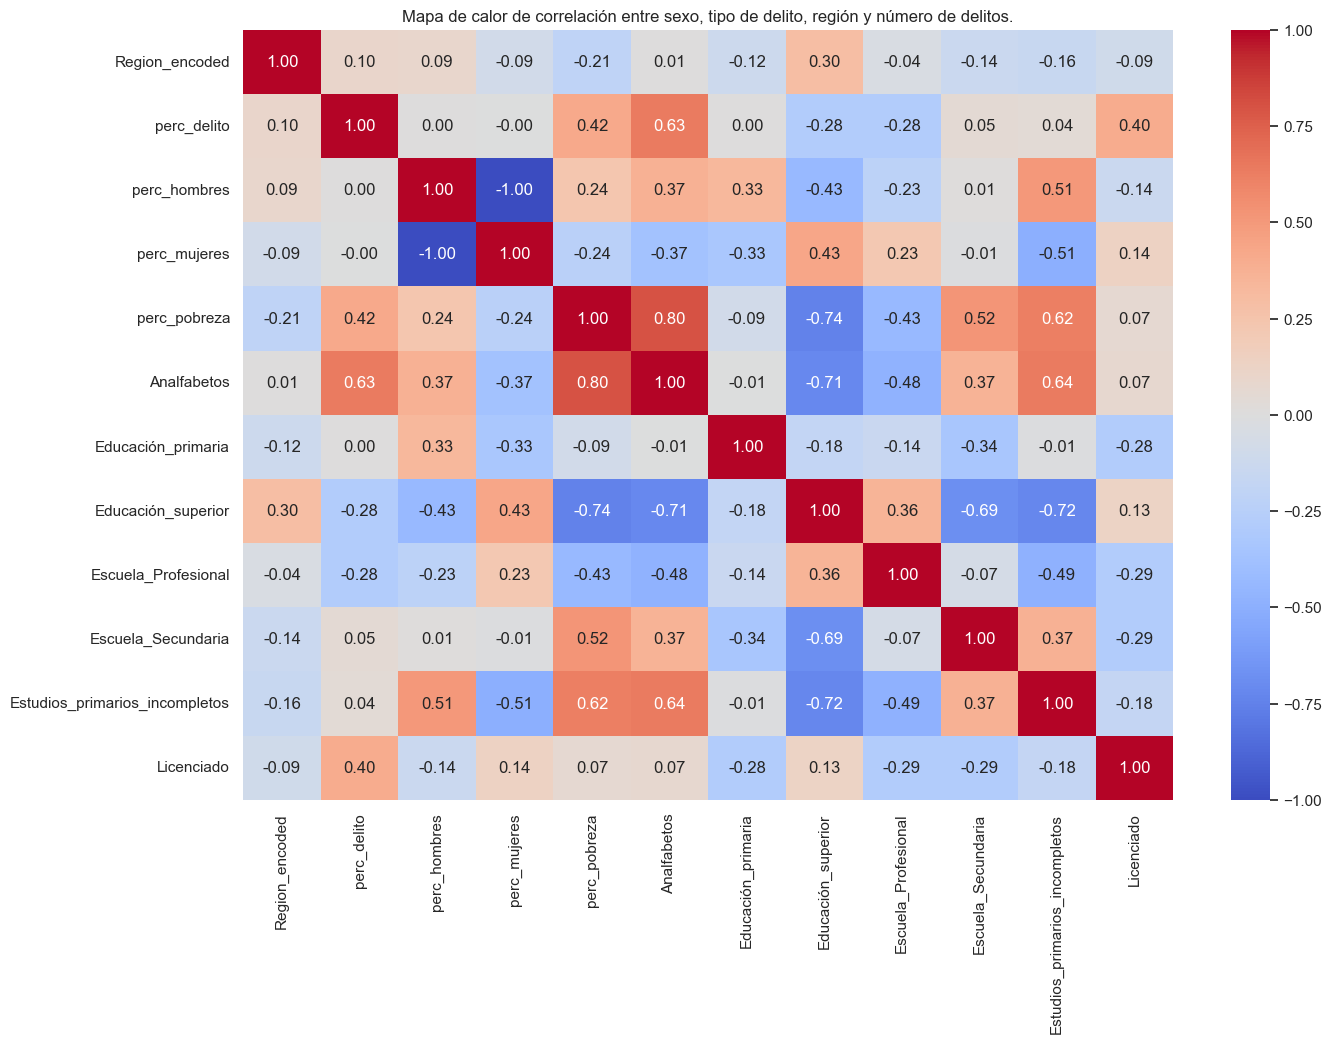

In [90]:
# Correlation plot entre todas las variables para ver la dependencia entre características
import matplotlib.pyplot as plt
import seaborn as sns
df_filtered_summ = final_df
# Codificación de "tipo_de_delito" y "genero"

df_filtered_summ['Region_encoded'] = df_filtered_summ['Region'].astype('category').cat.codes

# Calcular las correlaciones entre las variables codificadas y el "Valor".
corr = df_filtered_summ[['Region_encoded', 'perc_delito','perc_hombres', 'perc_mujeres','perc_pobreza','Analfabetos','Educación_primaria','Educación_superior','Escuela_Profesional','Escuela_Secundaria','Estudios_primarios_incompletos','Licenciado']]
corr = corr.corr()
# Plotting heatmap de correlaciones
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de correlación entre sexo, tipo de delito, región y número de delitos.')
plt.show()

In [91]:
print(final_df)

                          Region   año  perc_delito  perc_hombres  \
0                      Rioja, La  2013         0.73         89.98   
1                     País Vasco  2013         0.58         89.85   
2                      Andalucía  2013         0.78         89.39   
3        Asturias, Principado de  2013         0.67         89.04   
4                 Balears, Illes  2013         0.99         87.70   
..                           ...   ...          ...           ...   
185                    Cantabria  2022         1.10         79.89   
186                   País Vasco  2022         1.15         82.01   
187  Navarra, Comunidad Foral de  2022         1.01         85.73   
188      Asturias, Principado de  2022         1.02         79.92   
189               Balears, Illes  2022         1.23         81.81   

     perc_mujeres  perc_pobreza  Analfabetos  Educación_primaria  \
0           10.02          16.2         0.65               19.58   
1           10.15          10.2    

In [92]:
#porcentaje Delitos tiene una fuerte relación positiva y negativa en función del nivel educativo.
#porcentaje Delitos y el porcentaje de pobreza también tiene una buena correlación psoitiva
#porcentaje Delitos y genero también tiene poca correlación y se puede abandonar
#Eliminación de campos con menor correlación con el porcentaje Delitos
df_filtered_summ = df_filtered_summ.drop('Escuela_Secundaria', axis=1)
df_filtered_summ = df_filtered_summ.drop('Estudios_primarios_incompletos', axis=1)
df_filtered_summ = df_filtered_summ.drop('Educación_primaria', axis=1)
df_filtered_summ = df_filtered_summ.drop('perc_hombres', axis=1)
df_filtered_summ = df_filtered_summ.drop('perc_mujeres', axis=1)


In [93]:
df_filtered_summ

Region   año  perc_delito  perc_pobreza  \
0                      Rioja, La  2013         0.73          16.2   
1                     País Vasco  2013         0.58          10.2   
2                      Andalucía  2013         0.78          33.3   
3        Asturias, Principado de  2013         0.67          16.7   
4                 Balears, Illes  2013         0.99          17.9   
..                           ...   ...          ...           ...   
185                    Cantabria  2022         1.10          14.8   
186                   País Vasco  2022         1.15          12.2   
187  Navarra, Comunidad Foral de  2022         1.01          10.9   
188      Asturias, Principado de  2022         1.02          20.1   
189               Balears, Illes  2022         1.23          16.9   

     Analfabetos  Educación_superior  Escuela_Profesional  Licenciado  \
0           0.65               28.83                 8.52       12.85   
1           0.62               36.42                 9.12       10.62   
2           3.78               21.78                 7.25       11.65   
3           0.65               29.58                 7.05       12.28   
4           1.85               22.78                 6.88       15.45   
..           ...                 ...                  ...         ...   
185         0.32               35.35                10.35       13.22   
186         0.35               44.32                 9.58       12.30   
187         0.82               37.70                10.70       12.92   
188         0.70               33.33                 9.18       13.58   
189         1.20               27.50                 8.77       17.98   

     Region_encoded  
0                18  
1                17  
2                 0  
3                 2  
4                 3  
..              ...  
185               5  
186              17  
187              16  
188               2  
189               3  

[190 rows x 9 columns]

In [94]:

df_summary = df_filtered_summ.groupby('año')['perc_delito'].sum().reset_index()
df_summary['año'] = pd.to_datetime(df_summary['año'].astype(str) + '-12-31')
df_summary.set_index('año', inplace=True)

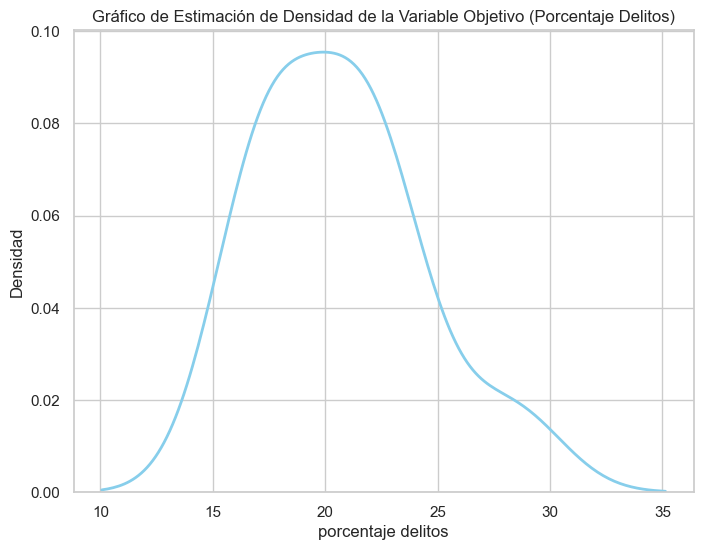

In [95]:

plt.figure(figsize=(8, 6))
sns.kdeplot(df_summary['perc_delito'], color='skyblue', linewidth=2)
plt.title('Gráfico de Estimación de Densidad de la Variable Objetivo (Porcentaje Delitos)')
plt.xlabel('porcentaje delitos')
plt.ylabel('Densidad')
plt.grid(True)
plt.show()

In [96]:
#El análisis es que el porcentaje de delitos sigue casi una distribución normal (ligera asimetría a la derecha).

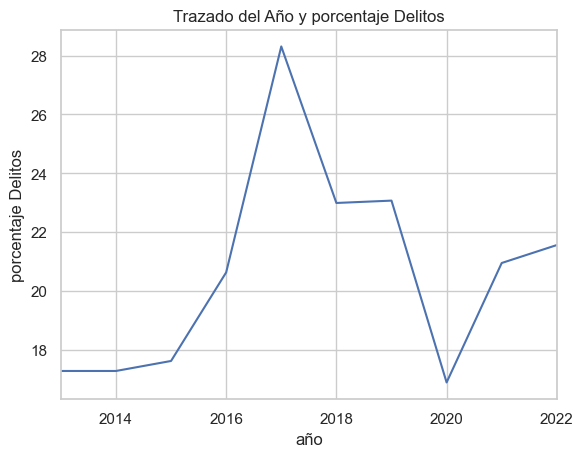

In [97]:
df_summary['perc_delito'].plot(title='Trazado del Año y porcentaje Delitos')
plt.ylabel('porcentaje Delitos')
plt.show()

In [98]:
#La caída de los delitos en 2020 puede deberse a la corona

In [99]:
#Previsión del porcentaje total de delitos mediante ARIMA

In [100]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

result = adfuller(df_summary['perc_delito'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# Interpretación de p-value
if result[1] > 0.05:
    print('La serie no es estacionaria')
else:
    print('La serie es estacionaria')

ADF Statistic: -740.325475
p-value: 0.000000
La serie es estacionaria


In [101]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [102]:
from pmdarima.arima import auto_arima

model = auto_arima(df_summary['perc_delito'], start_p=0, start_q=0,
                   test='adf',       
                   max_p=3, max_q=3,
                   m=1,           
                   d=None,          
                   seasonal=False,  
                   start_P=0, 
                   D=0, 
                   trace=True,
                   error_action='ignore',  
                   suppress_warnings=True, 
                   stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=57.654, Time=0.00 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=55.467, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.02 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=55.655, Time=0.00 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=57.460, Time=0.01 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=57.403, Time=0.01 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=53.510, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=55.507, Time=0.01 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=55.461, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 0.200 seconds


In [103]:
#Considerando orden de 0 ,2, 0 para orden 

model = ARIMA(df_summary['perc_delito'], order=(1,2,0))
model_fit = model.fit()
# Summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            perc_delito   No. Observations:                   10
Model:                 ARIMA(1, 2, 0)   Log Likelihood                 -24.755
Date:                Thu, 06 Jun 2024   AIC                             53.510
Time:                        18:05:30   BIC                             53.669
Sample:                    12-31-2013   HQIC                            52.438
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6061      0.481     -1.261      0.207      -1.548       0.336
sigma2        26.9404     23.484      1.147      0.251     -19.088      72.969
Ljung-Box (L1) (Q):                   0.05   Jarque-

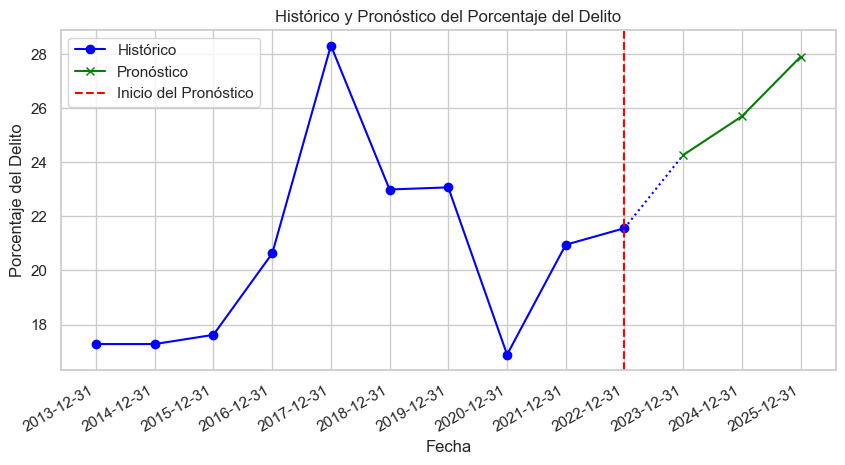

                Fecha  Pronóstico
2023-12-31 2023-12-31   24.261125
2024-12-31 2024-12-31   25.694770
2025-12-31 2025-12-31   27.896665


In [104]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# Predicción para los siguientes 2 años

Pronóstico_dates = pd.date_range('2023-12-31', periods=3, freq='A')

Pronóstico = model_fit.forecast(steps=len(Pronóstico_dates))

# Plot la predicción
plt.figure(figsize=(10, 5))

# Plot datos históricos
plt.plot(df_summary.index, df_summary['perc_delito'], label='Histórico', color='blue', marker='o')

# Connect the last historical point to the first forecast point
last_historical_date = df_summary.index[-1]
last_historical_value = df_summary['perc_delito'].iloc[-1]
first_forecast_date = Pronóstico_dates[0]
first_forecast_value = Pronóstico[0]
plt.plot([last_historical_date, first_forecast_date], [last_historical_value, first_forecast_value], color='blue', linestyle='dotted')

# Plot datos predichos
plt.plot(Pronóstico_dates, Pronóstico, label='Pronóstico', color='green', marker='x')

# Add vertical line and annotate the start of the forecast
plt.axvline(x=last_historical_date, color='red', linestyle='--', label='Inicio del Pronóstico')


# Adjudicar labels y title
plt.xlabel('Fecha')
plt.ylabel('Porcentaje del Delito')
plt.title('Histórico y Pronóstico del Porcentaje del Delito')

# Girar y formatear la fecha en el eje x
# Fijar los ticks principales a final de año y formatear la fecha en el eje x
plt.gca().xaxis.set_major_locator(mdates.YearLocator(month=12, day=31))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()  # Rotation
plt.legend()
plt.show()

# DataFrame para la previsión - suponiendo que model_fit.forecast() devuelve un array numpy
Pronóstico_df = pd.DataFrame({
    'Fecha': Pronóstico_dates,
    'Pronóstico': Pronóstico  # Aplanar en caso de que la previsión sea multidimensional
})

print(Pronóstico_df)

In [105]:
#Predicción del número de delitos considerando la edad y el tipo de delito como regresores

#Prophet

In [106]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [107]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import joblib  # para guardar el modelo de codificador

# Inicializar los encoders
region_encoder = LabelEncoder()
df_filtered_summ = df_filtered_summ.drop(['Region_encoded'], axis=1, errors='ignore')
df_filtered_summ['region_encoded'] = region_encoder.fit_transform(df_filtered_summ['Region'])
df_filtered_summ

Region   año  perc_delito  perc_pobreza  \
0                      Rioja, La  2013         0.73          16.2   
1                     País Vasco  2013         0.58          10.2   
2                      Andalucía  2013         0.78          33.3   
3        Asturias, Principado de  2013         0.67          16.7   
4                 Balears, Illes  2013         0.99          17.9   
..                           ...   ...          ...           ...   
185                    Cantabria  2022         1.10          14.8   
186                   País Vasco  2022         1.15          12.2   
187  Navarra, Comunidad Foral de  2022         1.01          10.9   
188      Asturias, Principado de  2022         1.02          20.1   
189               Balears, Illes  2022         1.23          16.9   

     Analfabetos  Educación_superior  Escuela_Profesional  Licenciado  \
0           0.65               28.83                 8.52       12.85   
1           0.62               36.42                 9.12       10.62   
2           3.78               21.78                 7.25       11.65   
3           0.65               29.58                 7.05       12.28   
4           1.85               22.78                 6.88       15.45   
..           ...                 ...                  ...         ...   
185         0.32               35.35                10.35       13.22   
186         0.35               44.32                 9.58       12.30   
187         0.82               37.70                10.70       12.92   
188         0.70               33.33                 9.18       13.58   
189         1.20               27.50                 8.77       17.98   

     region_encoded  
0                18  
1                17  
2                 0  
3                 2  
4                 3  
..              ...  
185               5  
186              17  
187              16  
188               2  
189               3  

[190 rows x 9 columns]

In [108]:
# Guarda los codificadores para utilizarlos en el futuro
joblib.dump(region_encoder, 'region_encoder.joblib')

['region_encoder.joblib']

In [109]:
from prophet  import Prophet
import pandas as pd

# Prepare su DataFrame para Prophet
df_filtered_summ['ds'] = pd.to_datetime(df_filtered_summ['año'].astype(str) + '-12-31')
df_filtered_summ['y'] = df_filtered_summ['perc_delito']


In [110]:
df_filtered_summ

Region   año  perc_delito  perc_pobreza  \
0                      Rioja, La  2013         0.73          16.2   
1                     País Vasco  2013         0.58          10.2   
2                      Andalucía  2013         0.78          33.3   
3        Asturias, Principado de  2013         0.67          16.7   
4                 Balears, Illes  2013         0.99          17.9   
..                           ...   ...          ...           ...   
185                    Cantabria  2022         1.10          14.8   
186                   País Vasco  2022         1.15          12.2   
187  Navarra, Comunidad Foral de  2022         1.01          10.9   
188      Asturias, Principado de  2022         1.02          20.1   
189               Balears, Illes  2022         1.23          16.9   

     Analfabetos  Educación_superior  Escuela_Profesional  Licenciado  \
0           0.65               28.83                 8.52       12.85   
1           0.62               36.42                 9.12       10.62   
2           3.78               21.78                 7.25       11.65   
3           0.65               29.58                 7.05       12.28   
4           1.85               22.78                 6.88       15.45   
..           ...                 ...                  ...         ...   
185         0.32               35.35                10.35       13.22   
186         0.35               44.32                 9.58       12.30   
187         0.82               37.70                10.70       12.92   
188         0.70               33.33                 9.18       13.58   
189         1.20               27.50                 8.77       17.98   

     region_encoded         ds     y  
0                18 2013-12-31  0.73  
1                17 2013-12-31  0.58  
2                 0 2013-12-31  0.78  
3                 2 2013-12-31  0.67  
4                 3 2013-12-31  0.99  
..              ...        ...   ...  
185               5 2022-12-31  1.10  
186              17 2022-12-31  1.15  
187              16 2022-12-31  1.01  
188               2 2022-12-31  1.02  
189               3 2022-12-31  1.23  

[190 rows x 11 columns]

In [111]:
    # Inicializar y ajustar el modelo de Prophet con regresores adicionales
								
# Obtener regiones únicas del DataFrame
unique_regions = df_filtered_summ['Region'].unique()
lgbm_models = {}
for region in unique_regions:
  model = Prophet(yearly_seasonality=False)
  model.add_regressor('perc_pobreza')
  model.add_regressor('Analfabetos')
  model.add_regressor('Educación_superior')
  model.add_regressor('Escuela_Profesional')
  model.add_regressor('Licenciado')
  model.fit(df_filtered_summ[df_filtered_summ['Region'] == region ][['ds','perc_pobreza','Analfabetos','Educación_superior','Escuela_Profesional','Licenciado','y']], algorithm='LBFGS', iter=20000)
  lgbm_models[region] = model

18:05:46 - cmdstanpy - INFO - Chain [1] start processing
18:05:46 - cmdstanpy - INFO - Chain [1] done processing
18:05:46 - cmdstanpy - INFO - Chain [1] start processing
18:05:46 - cmdstanpy - INFO - Chain [1] done processing
18:05:46 - cmdstanpy - INFO - Chain [1] start processing
18:05:46 - cmdstanpy - INFO - Chain [1] done processing
18:05:46 - cmdstanpy - INFO - Chain [1] start processing
18:05:46 - cmdstanpy - INFO - Chain [1] done processing
18:05:46 - cmdstanpy - INFO - Chain [1] start processing
18:05:46 - cmdstanpy - INFO - Chain [1] done processing
18:05:47 - cmdstanpy - INFO - Chain [1] start processing
18:05:47 - cmdstanpy - INFO - Chain [1] done processing
18:05:47 - cmdstanpy - INFO - Chain [1] start processing
18:05:47 - cmdstanpy - INFO - Chain [1] done processing
18:05:47 - cmdstanpy - INFO - Chain [1] start processing
18:05:47 - cmdstanpy - INFO - Chain [1] done processing
18:05:47 - cmdstanpy - INFO - Chain [1] start processing
18:05:47 - cmdstanpy - INFO - Chain [1]

In [112]:
#Las variables de entrada de los parámetros de predicción y de regresión externa utilizan el último valor de la serie temporal
region_input = "País Vasco"
año_de_predicción = 2025
perc_pobreza_input = 16.9
Analfabetos_input = 1.20	
Educación_superior_input = 27.50
Escuela_Profesional_input = 8.77
Licenciado_input = 17.98

In [113]:
df_filtered_summ

Region   año  perc_delito  perc_pobreza  \
0                      Rioja, La  2013         0.73          16.2   
1                     País Vasco  2013         0.58          10.2   
2                      Andalucía  2013         0.78          33.3   
3        Asturias, Principado de  2013         0.67          16.7   
4                 Balears, Illes  2013         0.99          17.9   
..                           ...   ...          ...           ...   
185                    Cantabria  2022         1.10          14.8   
186                   País Vasco  2022         1.15          12.2   
187  Navarra, Comunidad Foral de  2022         1.01          10.9   
188      Asturias, Principado de  2022         1.02          20.1   
189               Balears, Illes  2022         1.23          16.9   

     Analfabetos  Educación_superior  Escuela_Profesional  Licenciado  \
0           0.65               28.83                 8.52       12.85   
1           0.62               36.42                 9.12       10.62   
2           3.78               21.78                 7.25       11.65   
3           0.65               29.58                 7.05       12.28   
4           1.85               22.78                 6.88       15.45   
..           ...                 ...                  ...         ...   
185         0.32               35.35                10.35       13.22   
186         0.35               44.32                 9.58       12.30   
187         0.82               37.70                10.70       12.92   
188         0.70               33.33                 9.18       13.58   
189         1.20               27.50                 8.77       17.98   

     region_encoded         ds     y  
0                18 2013-12-31  0.73  
1                17 2013-12-31  0.58  
2                 0 2013-12-31  0.78  
3                 2 2013-12-31  0.67  
4                 3 2013-12-31  0.99  
..              ...        ...   ...  
185               5 2022-12-31  1.10  
186              17 2022-12-31  1.15  
187              16 2022-12-31  1.01  
188               2 2022-12-31  1.02  
189               3 2022-12-31  1.23  

[190 rows x 11 columns]

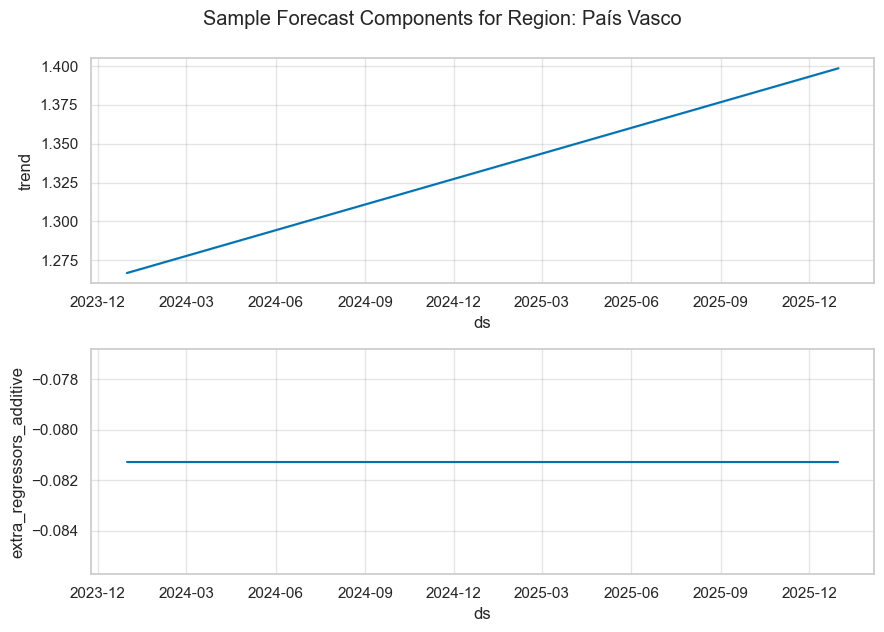

In [114]:

# Cargar region_encoder
loaded_region_encoder = joblib.load('region_encoder.joblib')
final_pred_df_proph = df_filtered_summ

# Obtener regiones únicas del DataFrame
unique_regions = df_filtered_summ['Region'].unique()

# Preparar el futuro DataFrame para predicciones
last_known_year = df_filtered_summ['ds'].dt.year.max()
future_years = list(range(last_known_year + 1, año_de_predicción + 1))
future_dates = pd.to_datetime([f"{year}-12-31" for year in future_years])

# Diccionario de predicciones para cada región
region_predictions = {}

for region in unique_regions:
    # Codificar la región actual
    input_region_encoded = loaded_region_encoder.transform([region])[0]
    
    # Obtener los últimos valores conocidos de los regresores adicionales
    last_values = df_filtered_summ[df_filtered_summ['Region'] == region].iloc[-1]
    
    # Preparar el futuro DataFrame para la región actual
    future_df = pd.DataFrame({
        'ds': future_dates,
        'region_encoded': input_region_encoded,
        'perc_pobreza': last_values['perc_pobreza'],
        'Analfabetos': last_values['Analfabetos'],
        'Educación_superior': last_values['Educación_superior'],
        'Escuela_Profesional': last_values['Escuela_Profesional'],
        'Licenciado': last_values['Licenciado']
    })
    
    # Hacer predicciones para la región actual
    Pronóstico = lgbm_models[region].predict(future_df)
    
    # Almacenar o procesar las predicciones
    region_predictions[region] = Pronóstico
    merged_grouped_prophh = pd.merge(future_df, Pronóstico, on=['ds'])
    merged_grouped_prophh['Region'] = region
    merged_grouped_prophh['año'] =  merged_grouped_prophh['ds'].dt.year
    merged_grouped_prophh = merged_grouped_prophh.rename(columns={'yhat': 'y','perc_pobreza_x': 'perc_pobreza','Analfabetos_x': 'Analfabetos','Educación_superior_x': 'Educación_superior','Escuela_Profesional_x': 'Escuela_Profesional','Licenciado_x': 'Licenciado'})
    columns_to_select = ['Region', 'año',  'perc_pobreza', 'Analfabetos', 
                     'Educación_superior', 'Escuela_Profesional', 'Licenciado', 
                     'region_encoded', 'ds', 'y']
    final_pred_df_proph = pd.concat([final_pred_df_proph,merged_grouped_prophh[columns_to_select]])
    
    # Almacenar o procesar las predicciones
    # Crear una cifra para los componentes de la previsión de cada región
    if region_input == region:  
        fig = lgbm_models[region].plot_components(Pronóstico)
        fig.suptitle(f"Sample Forecast Components for Region: {region}", y=1.05)  # Adjust title spacing
        plt.show()

In [115]:
file_path = r'Predicción completa para Prophet con retrasos construidos (región).xlsx'
final_pred_df_proph.to_excel(file_path, index=False, engine='openpyxl')

In [116]:
from prophet.diagnostics import cross_validation
cutoffs = pd.to_datetime(['2013-12-31', '2021-12-31'])
df_cv = cross_validation(lgbm_models[region_input],horizon = '365 days',initial = '2920 days', period = '365 days')
df_cv.head() 

  0%|          | 0/1 [00:00<?, ?it/s]

18:05:57 - cmdstanpy - INFO - Chain [1] start processing
18:05:57 - cmdstanpy - INFO - Chain [1] done processing


ds      yhat  yhat_lower  yhat_upper     y     cutoff
0 2022-12-31  1.039048    0.825269    1.256371  1.15 2021-12-31

In [117]:
#MÉTRICAS SEGÚN EL HORIZONTE
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

horizon      mse      rmse       mae     mape    mdape    smape  coverage
0 365 days  0.01231  0.110952  0.110952  0.09648  0.09648  0.10137       1.0

In [118]:
from prophet.utilities import regressor_coefficients
column_details = {
    "regressor": "object",
    "regressor_mode": "object",
    "center": "float64",
    "coef_lower": "float64",
    "coef": "float64",
    "coef_upper": "float64"
}
regressor_df = pd.DataFrame(columns=column_details.keys()).astype(column_details)
  
for region in unique_regions:
  regressor_df_temp = regressor_coefficients(lgbm_models[region])
  regressor_df = pd.concat([regressor_df,regressor_df_temp])
regressor_df.groupby(['regressor','regressor_mode']).mean()

center  coef_lower      coef  \
regressor           regressor_mode                                    
Analfabetos         additive         1.671737    0.111300  0.111300   
Educación_superior  additive        28.457579   -0.019189 -0.019189   
Escuela_Profesional additive         8.046895    0.034071  0.034071   
Licenciado          additive        13.687211    0.020285  0.020285   
perc_pobreza        additive        21.584737   -0.013053 -0.013053   

                                    coef_upper  
regressor           regressor_mode              
Analfabetos         additive          0.111300  
Educación_superior  additive         -0.019189  
Escuela_Profesional additive          0.034071  
Licenciado          additive          0.020285  
perc_pobreza        additive         -0.013053

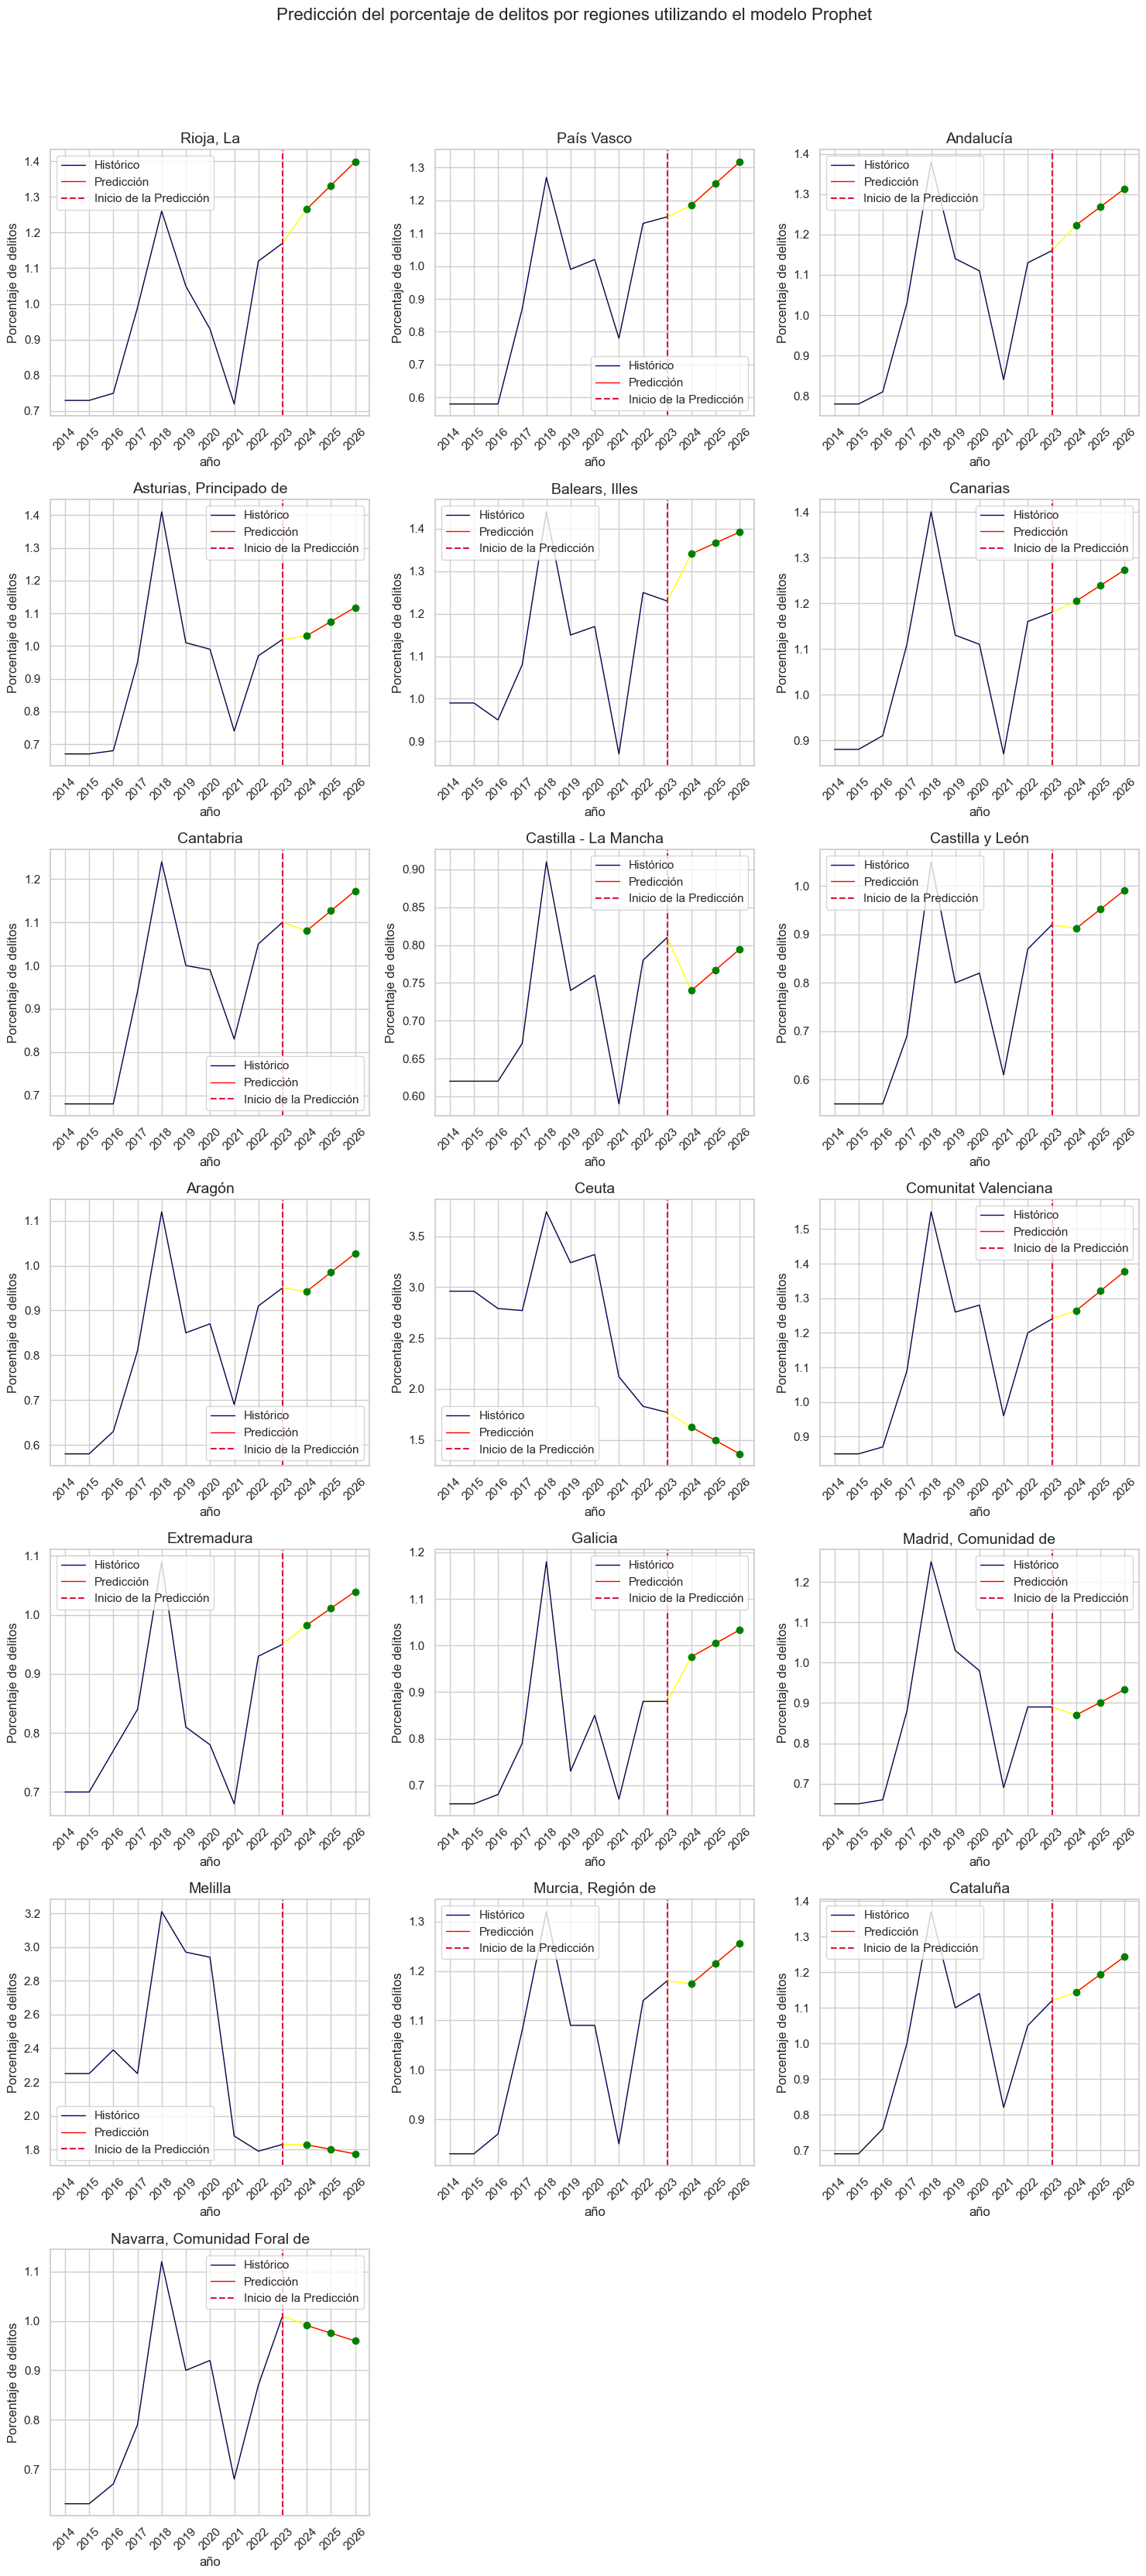

In [119]:

from math import ceil, sqrt
import matplotlib.dates as mdates
sns.set(style="whitegrid")

num_regions = len(region_predictions)
cols = 3  
rows = ceil(num_regions / cols)  

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))
fig.subplots_adjust(hspace=0.6, wspace=0.4, top=.9)

axes = axes.flatten() if rows * cols > 1 else [axes]

for index, (region, Pronóstico) in enumerate(region_predictions.items()):
    # Filtrar los datos históricos de la región actual
    input_region_encoded = loaded_region_encoder.transform([region])[0]
    historical_data = df_filtered_summ[(df_filtered_summ['region_encoded'] == input_region_encoded)]

    # Preparar datos de previsión para el plotting
    Pronóstico_data = Pronóstico[['ds', 'yhat']].rename(columns={'yhat': 'y'})
    
    # Combinar datos históricos y previsiones
    combined_data = pd.concat([historical_data, Pronóstico_data])
    combined_data = combined_data.sort_values(by='ds')


    ax = axes[index]
    ax.plot(combined_data['ds'], combined_data['y'], color='yellow', linewidth=1)
    ax.plot(historical_data['ds'], historical_data['y'], label='Histórico', color='navy', linewidth=1)
    ax.plot(Pronóstico_data['ds'], Pronóstico_data['y'], label='Predicción', color='red', linewidth=1)
    ax.scatter(Pronóstico_data['ds'], Pronóstico_data['y'], color='green', zorder=5)

    #ax.plot(combined_data['ds'], combined_data['y'], label='Histórico + Predicción', color='navy', linewidth=2)
    ax.axvline(x=pd.to_datetime('2023'), color='crimson', linestyle='--', label='Inicio de la Predicción')
    ax.set_xlabel('año')
    ax.set_ylabel('Porcentaje de delitos')
    ax.set_title(f'{region}', fontsize=14)
    ax.legend()

    # Establecer formato de fecha
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

    # Activar explícitamente la visibilidad de las etiquetas del eje x para cada subplot
    for label in ax.get_xticklabels():
        label.set_visible(True)
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
# Ocultar los ejes no utilizados 
for i in range(index + 1, len(axes)):
    axes[i].set_visible(False)
fig.suptitle('Predicción del porcentaje de delitos por regiones utilizando el modelo Prophet', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



In [135]:
#La puntuación RMSE es baja y el modelo arroja buenos resultados .

In [42]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [137]:
#En los siguientes pasos predeciremos el porcentaje de crimen para todas las regiones basado en el regresor LGBM.
#Aquí tomamos los rezagos de los tres pasos de tiempo anteriores como parte de cada registro para poder crear la dependencia.

In [120]:
df_filtered_summ = df_filtered_summ.sort_values(by=[ 'region_encoded', 'ds'])
df_filtered_summ['y_lag1'] = df_filtered_summ.groupby([ 'region_encoded'])['y'].shift(1)
df_filtered_summ['y_lag2'] = df_filtered_summ.groupby([ 'region_encoded'])['y'].shift(2)
df_filtered_summ['y_lag3'] = df_filtered_summ.groupby([ 'region_encoded'])['y'].shift(3)
# Fill missing values in lagged columns with the first available 'y' value in each group
df_filtered_summ['y_lag1'] = df_filtered_summ.groupby([ 'region_encoded'])['y_lag1'].transform(lambda x: x.fillna(method='bfill'))
df_filtered_summ['y_lag2'] = df_filtered_summ.groupby([ 'region_encoded'])['y_lag2'].transform(lambda x: x.fillna(method='bfill'))
df_filtered_summ['y_lag3'] = df_filtered_summ.groupby([ 'region_encoded'])['y_lag3'].transform(lambda x: x.fillna(method='bfill'))

df_filtered_summ['y'] = df_filtered_summ['y'].astype(float)

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

cutoff_date = df_filtered_summ['ds'].max() - pd.DateOffset(years=2)

# Divida su conjunto de datos en función de la fecha de corte
train_df = df_filtered_summ[df_filtered_summ['ds'] <= cutoff_date][[ 'region_encoded','perc_pobreza','Analfabetos','Educación_superior','Escuela_Profesional','Licenciado', 'y_lag1', 'y_lag2', 'y_lag3','ds','y']]
test_df = df_filtered_summ[df_filtered_summ['ds'] > cutoff_date][[ 'region_encoded','perc_pobreza','Analfabetos','Educación_superior','Escuela_Profesional','Licenciado', 'y_lag1', 'y_lag2', 'y_lag3','ds','y']]

# Dividir los datos en conjuntos de entrenamiento y de prueba
X_train = train_df.drop(['ds', 'y'], axis=1)
y_train = train_df['y']
X_test = test_df.drop(['ds', 'y'], axis=1)
y_test = test_df['y']

In [122]:
# Inicializar y entrenar el modelo LightGBM
from lightgbm import LGBMRegressor
model = LGBMRegressor(
    num_leaves=20,
    learning_rate=0.001,
    n_estimators=500
)

model.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='l2')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000045 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 352
[LightGBM] [Info] Number of data points in the train set: 152, number of used features: 9
[LightGBM] [Info] Start training from score 1.079408
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

LGBMRegressor(learning_rate=0.001, n_estimators=500, num_leaves=20)

In [123]:
# Guardar el modelo en disco
from joblib import dump
model_path = 'lgbm_regressor.joblib'
dump(model, model_path)
model.booster_.save_model('lgbm_regressor.txt')

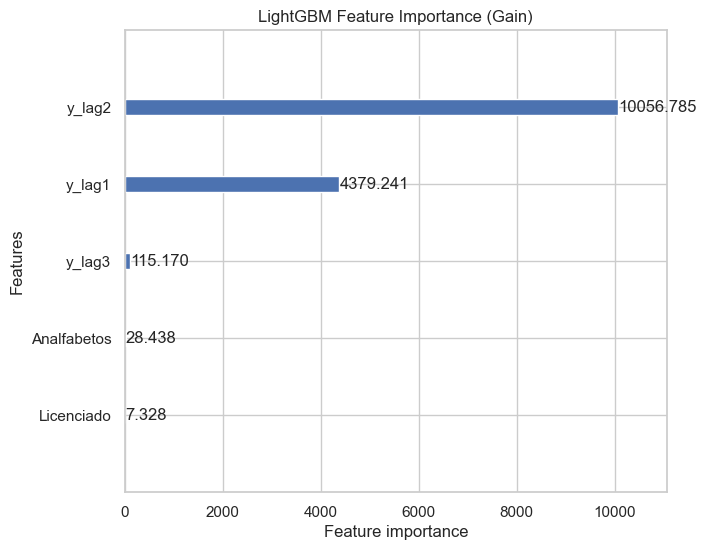

In [124]:
#Importancia de la función LighBgm
import  lightgbm as lgb
lgb.plot_importance(model, importance_type="gain", figsize=(7,6), title="LightGBM Feature Importance (Gain)")
plt.show()

In [125]:
import numpy as np
# Hacer predicciones
y_pred = model.predict(X_test, num_iteration=model.best_iteration_)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

r_cuadrado = r2_score(y_test,y_pred)

print(f'MSE: {mse}')
print(f'RMSE de prueba: {rmse}')
print(f'R^2: {r_cuadrado}')

MSE: 0.018886153333872256
RMSE de prueba: 0.1374269017837201
R^2: 0.7375229144876364


In [126]:

unique_regions = df_filtered_summ['Region'].unique()  
año_de_predicción = 2025

#Intialización dummy para el marco de almacenamiento de predicciones
final_pred_df_lgbm = df_filtered_summ[df_filtered_summ['region_encoded'] == '111111111']

# Iterar sobre cada combinación única
for region_input in unique_regions:
            # Codificar los parámetros de entrada de la combinación actual
    input_region_encoded = loaded_region_encoder.transform([region_input])[0]
            
            # Filtrar df_filtered_summ para la combinación actual
    specific_filter =   (df_filtered_summ['region_encoded'] == input_region_encoded)
    filtered_for_specific = df_filtered_summ[specific_filter]

    if not filtered_for_specific.empty:
        filtered_for_specific = filtered_for_specific.sort_values('ds')
        last_date = filtered_for_specific['ds'].max()
        last_year = last_date.year
        for year in range(last_year + 1, año_de_predicción + 1):
                    # Suponiendo que tu modelo necesite al menos 1 registro para hacer una predicción
            if len(filtered_for_specific) >= 1:
                        # Preparar los datos de entrada para la predicción utilizando los últimos registros disponibles
                most_recent_pobreza = filtered_for_specific['perc_pobreza'].iloc[-1] if len(filtered_for_specific) >= 1 else 0
                most_recent_Analfabetos = filtered_for_specific['Analfabetos'].iloc[-1] if len(filtered_for_specific) >= 1 else 0
                most_recent_Educación_superior = filtered_for_specific['Educación_superior'].iloc[-1] if len(filtered_for_specific) >= 1 else 0
                most_recent_Escuela_Profesional = filtered_for_specific['Escuela_Profesional'].iloc[-1] if len(filtered_for_specific) >= 1 else 0
                most_recent_Licenciado = filtered_for_specific['Licenciado'].iloc[-1] if len(filtered_for_specific) >= 1 else 0
                most_recent_y = filtered_for_specific['y'].iloc[-1] if len(filtered_for_specific) >= 1 else 0
                most_recent_y1 = filtered_for_specific['y'].iloc[-2] if len(filtered_for_specific) >= 2 else most_recent_y
                most_recent_y2 = filtered_for_specific['y'].iloc[-3] if len(filtered_for_specific) >= 3 else most_recent_y1
                predict_df = pd.DataFrame({
                            'region_encoded': [input_region_encoded],
                            'perc_pobreza': [most_recent_pobreza],
                            'Analfabetos' : most_recent_Analfabetos,
                            'Educación_superior' : most_recent_Educación_superior,
                            'Escuela_Profesional' : most_recent_Escuela_Profesional,
                             'Licenciado' : most_recent_Licenciado,
                             'y_lag1': [most_recent_y],
                            'y_lag2': [most_recent_y1],
                            'y_lag3': [most_recent_y2]
                        })

                        # Hacer la predicción
                predicted_y = model.predict(predict_df)[0]
                        # Crear una nueva entrada para la predicción
                new_date = pd.Timestamp(year, 12, 31)
                new_entry = {
                            'ds': new_date,
                            'y': predicted_y,
                            'perc_pobreza':  predict_df.iloc[0]['perc_pobreza'],
                            'Analfabetos':  predict_df.iloc[0]['Analfabetos'],
                            'Educación_superior':  predict_df.iloc[0]['Educación_superior'],
                            'Escuela_Profesional':  predict_df.iloc[0]['Escuela_Profesional'],
                            'Licenciado':  predict_df.iloc[0]['Licenciado'],
                            'region_encoded': input_region_encoded,
                            'Region': region_input,
                        }

                        # Añada la nueva entrada a filtered_for_specific por continuidad
                new_entry_df = pd.DataFrame([new_entry])
                filtered_for_specific = pd.concat([filtered_for_specific, new_entry_df], ignore_index=True)
        final_pred_df_lgbm = pd.concat([final_pred_df_lgbm, filtered_for_specific], ignore_index=True)[['ds','Region','perc_pobreza','Analfabetos','Educación_superior','Escuela_Profesional','Licenciado','y','perc_delito']]
    else:
        print(f"No se encontraron datos históricos para la  Región: {region_input}.")

    

In [127]:
file_path = r'Predicción completa para LGBM reg con retrasos construidos (región).xlsx'
final_pred_df_lgbm.to_excel(file_path, index=False, engine='openpyxl')


In [128]:
# Diccionario para almacenar el valor máximo de delito previsto para cada combinación
max_pronosticados = {}

# Loop a través de cada combinación para llenar el diccionario

for region in unique_regions:

    df_current = final_pred_df_lgbm[
                (final_pred_df_lgbm['Region'] == region) ]

    Datos_pronosticado = df_current[df_current['ds'] >= pd.to_datetime('2023-01-01')]
    if not Datos_pronosticado.empty:
        max_pronosticado = Datos_pronosticado['y'].max()
        max_pronosticados[( region)] = max_pronosticado

# Ordenar el diccionario por valor y obtener las 10 mejores combinaciones
top_19_combinations = sorted(max_pronosticados, key=max_pronosticados.get, reverse=True)[:19]

In [129]:
df_current

ds     Region  perc_pobreza  Analfabetos  Educación_superior  \
234 2013-12-31  Rioja, La          16.2         0.65               28.83   
235 2014-12-31  Rioja, La          16.2         0.65               28.83   
236 2015-12-31  Rioja, La          17.1         0.65               30.38   
237 2016-12-31  Rioja, La          11.9         0.75               28.72   
238 2017-12-31  Rioja, La           9.7         0.95               28.55   
239 2018-12-31  Rioja, La          16.6         0.72               29.00   
240 2019-12-31  Rioja, La          12.3         0.52               30.12   
241 2020-12-31  Rioja, La          15.0         0.50               30.67   
242 2021-12-31  Rioja, La          16.1         0.95               31.65   
243 2022-12-31  Rioja, La          16.6         1.20               33.02   
244 2023-12-31  Rioja, La          16.6         1.20               33.02   
245 2024-12-31  Rioja, La          16.6         1.20               33.02   
246 2025-12-31  Rioja, La          16.6         1.20               33.02   

     Escuela_Profesional  Licenciado         y  perc_delito  
234                 8.52       12.85  0.730000         0.73  
235                 8.52       12.85  0.730000         0.73  
236                 8.22       13.20  0.750000         0.75  
237                 8.40       12.05  0.990000         0.99  
238                 8.65       13.02  1.260000         1.26  
239                 8.72       13.10  1.050000         1.05  
240                 8.48       13.20  0.930000         0.93  
241                 9.12       13.15  0.720000         0.72  
242                 9.55       13.23  1.120000         1.12  
243                 9.82       13.77  1.170000         1.17  
244                 9.82       13.77  1.087174          NaN  
245                 9.82       13.77  1.018797          NaN  
246                 9.82       13.77  1.018797          NaN

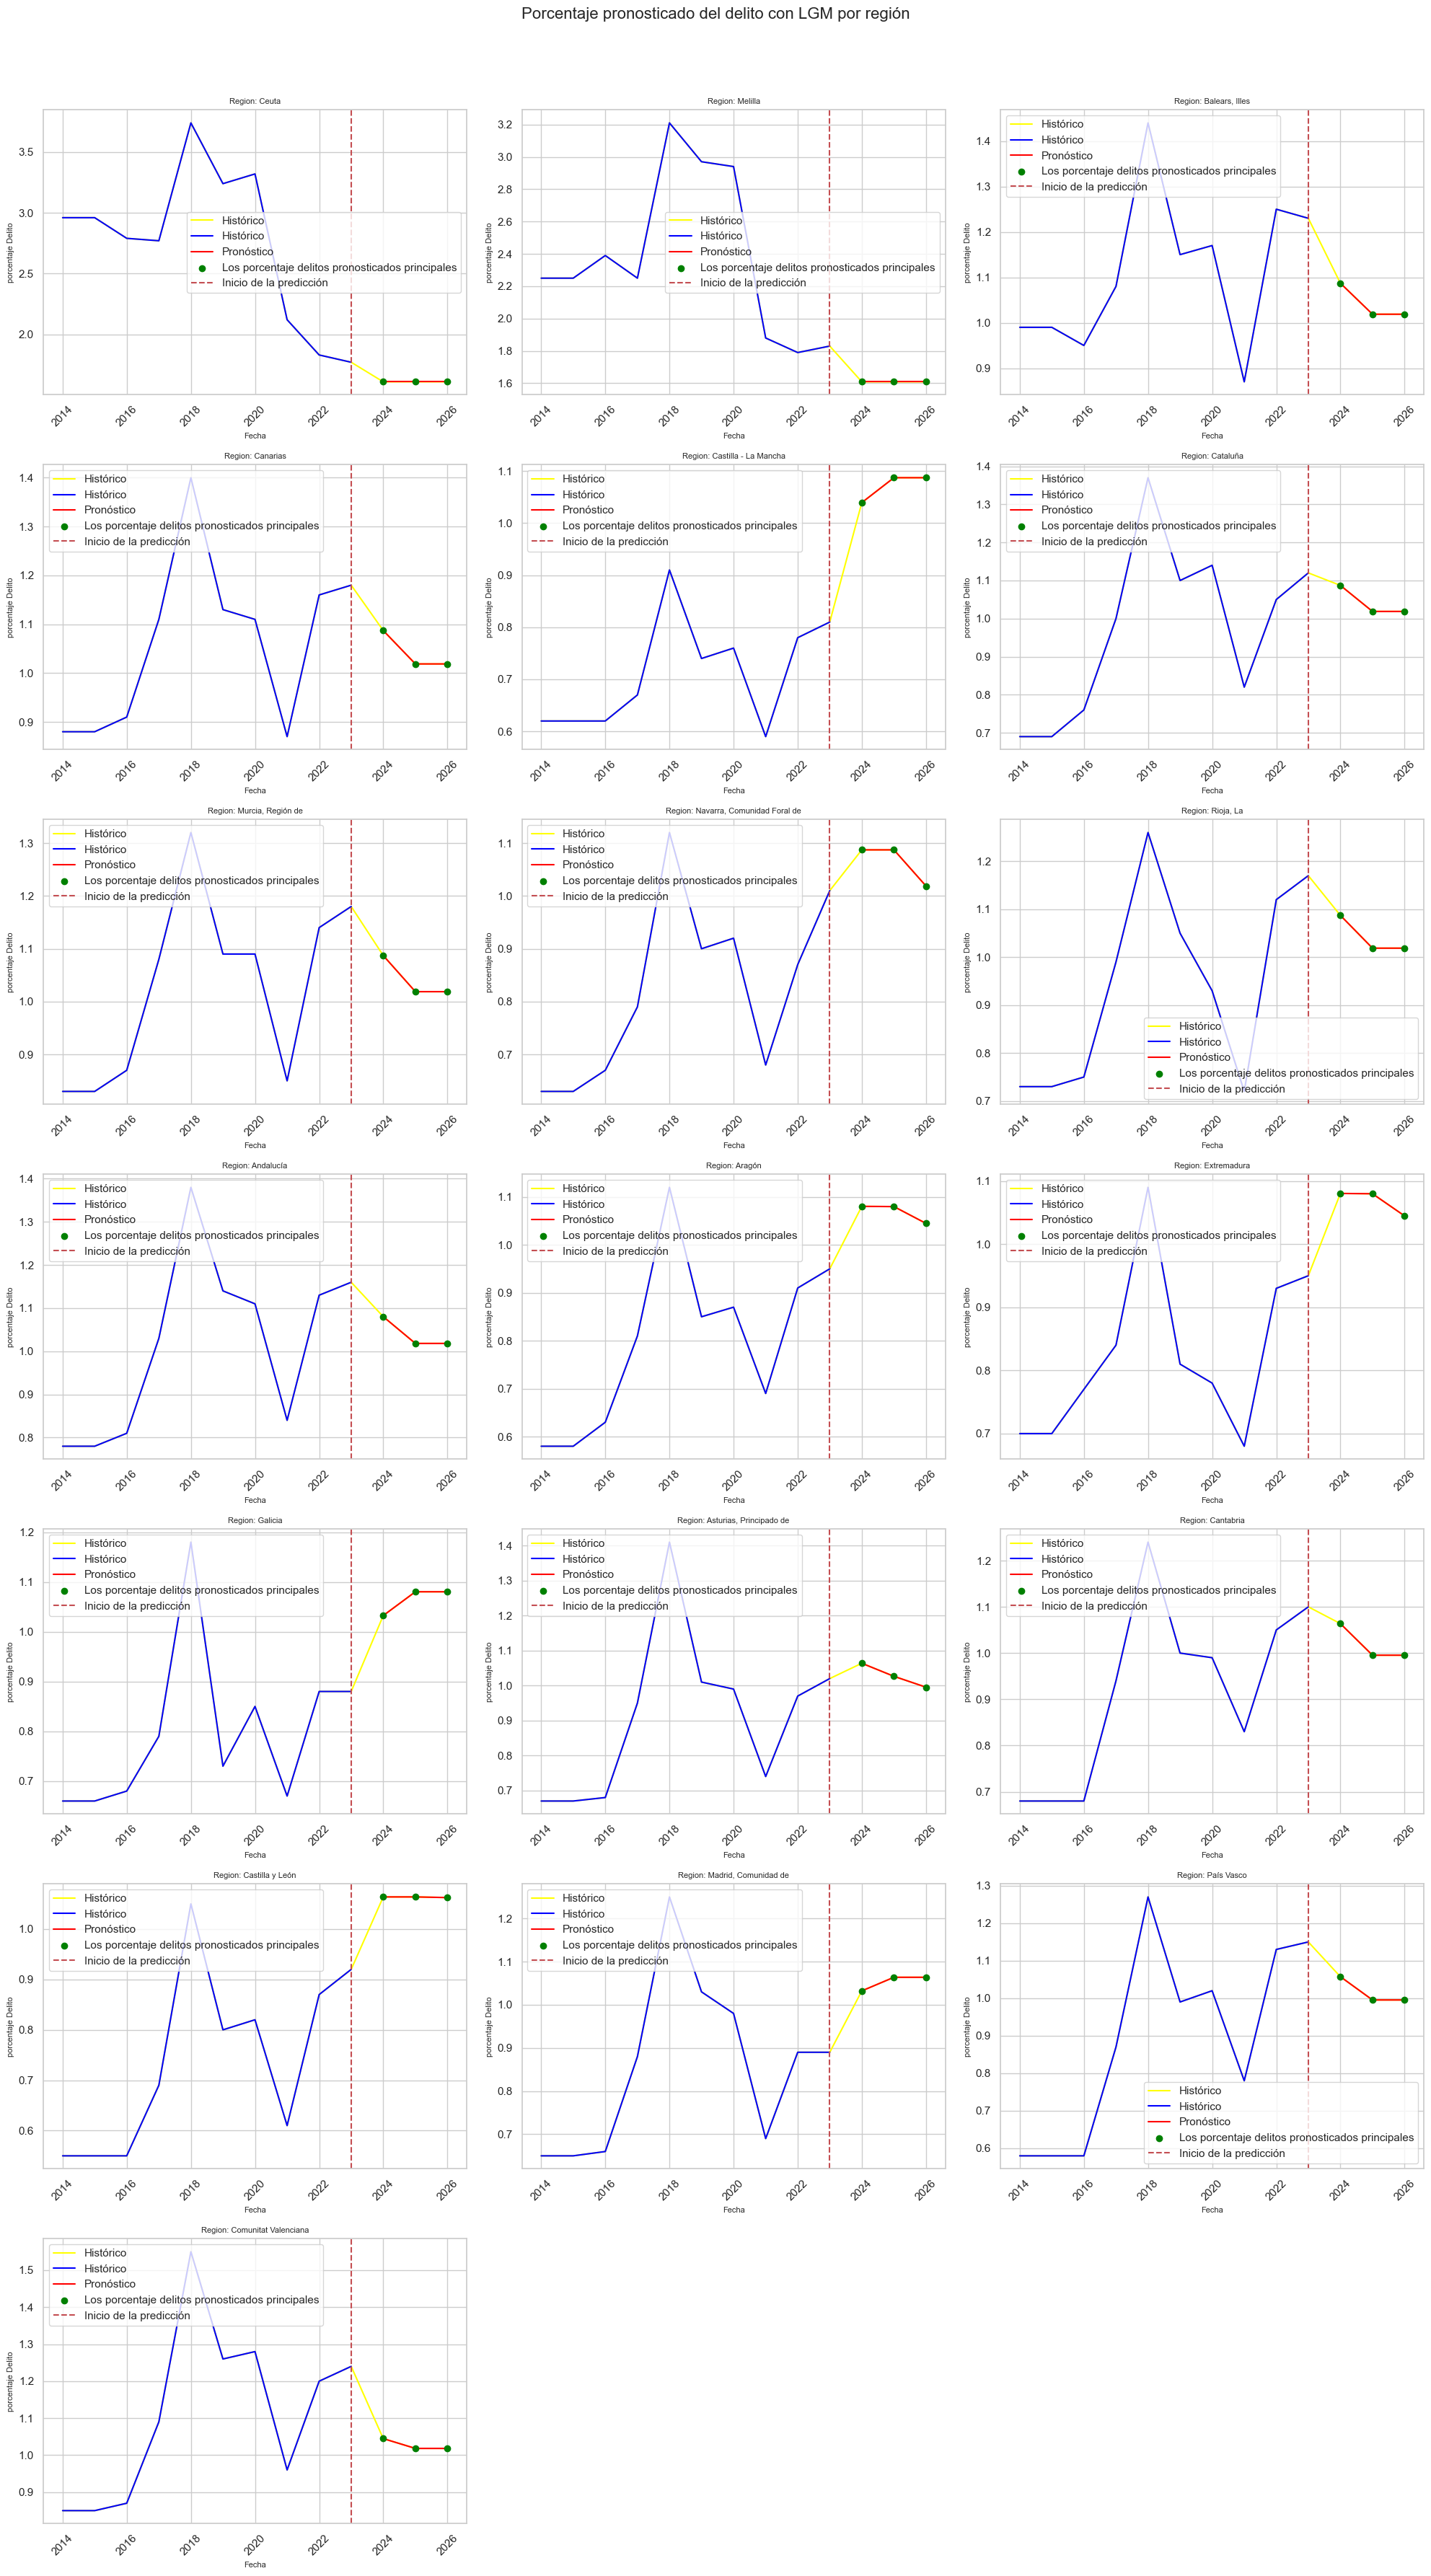

In [130]:
# Calcular las dimensiones de la cuadrícula
num_combinations = len(top_19_combinations)
num_rows = (num_combinations + 2) // 3  
num_cols = 3

fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))
fig.subplots_adjust(hspace=0.5, wspace=0.3)  
fig.suptitle('Porcentaje pronosticado del delito con LGM por región', fontsize=16, y=1.02)
axs = axs.flatten()
for i, combination in enumerate(top_19_combinations):
    region = combination
    df_current = final_pred_df_lgbm[ (final_pred_df_lgbm['Region'] == region)]
    latest_date = df_filtered_summ['ds'].max()
    historical_data = df_current[df_current['ds']<= latest_date]
    Datos_pronosticado = df_current[df_current['ds'] > latest_date]
    
    axs[i].plot(df_current['ds'], df_current['y'], label='Histórico', color='yellow')
    axs[i].plot(historical_data['ds'], historical_data['y'], label='Histórico', color='blue')
 
    axs[i].plot(Datos_pronosticado['ds'], Datos_pronosticado['y'], label='Pronóstico', color='red')
    

    # Destacar los 10 principales valores previstos en este segmento
    top_forecasted = Datos_pronosticado.nlargest(10, 'y')
    axs[i].scatter(top_forecasted['ds'], top_forecasted['y'], color='green', zorder=5, label='Los porcentaje delitos pronosticados principales')

    axs[i].set_title(f"Region: {region}", fontsize=8)
    axs[i].set_xlabel('Fecha', fontsize=8)
    axs[i].axvline(x=pd.to_datetime('2022-12-31'), color='r', linestyle='--', label='Inicio de la predicción')
    axs[i].set_ylabel('porcentaje Delito', fontsize=8)
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].legend()
# Desactivar los ejes de los subplots restantes
for j in range(i + 1, num_rows * num_cols):
    axs[j].axis('off')
    
plt.tight_layout()
plt.show()

In [149]:
#Predicción mediante un modelo de regresión lineal con tres lags

In [131]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Entrenar el modelo de regresión lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Hacer predicciones
y_pred_linear = linear_model.predict(X_test)

# Evaluar el modelo
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r_cuadrado = r2_score(y_test,y_pred)

print(f'R^2: {r_cuadrado}')
print(f'MSE: {mse_linear}')
print(f'RMSE: {rmse_linear}')

R^2: 0.7375229144876364
MSE: 0.06782800423250297
RMSE: 0.260438100577667


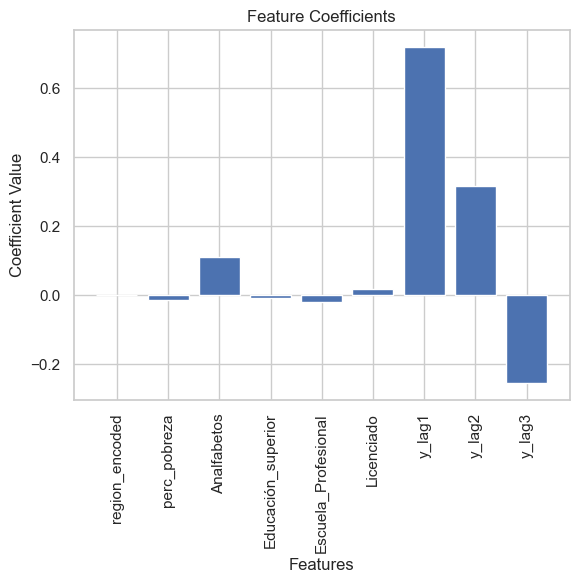

In [132]:
coefficients = linear_model.coef_
feature_names = X_train.columns
# Plotting los coeficientes
plt.bar(range(len(feature_names)), coefficients)
plt.xticks(range(len(feature_names)), feature_names, rotation=90)  # Add feature names as x-tick labels
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Feature Coefficients')
plt.show()

In [133]:

unique_regions = df_filtered_summ['Region'].unique()  
año_de_predicción = 2025
#dummy intialización para el marco de almacenamiento de predicciones
final_pred_df_linreg = df_filtered_summ[df_filtered_summ['region_encoded'] == '111111111']
# Iterar sobre cada combinación única
for region_input in unique_regions:
            # Codificar los parámetros de entrada de la combinación actual
    input_region_encoded = loaded_region_encoder.transform([region_input])[0]
            
            # Filtrar df_filtered_summ para la combinación actual
    specific_filter =   (df_filtered_summ['region_encoded'] == input_region_encoded)
    filtered_for_specific = df_filtered_summ[specific_filter]

    if not filtered_for_specific.empty:
        filtered_for_specific = filtered_for_specific.sort_values('ds')
        last_date = filtered_for_specific['ds'].max()
        last_year = last_date.year
        for year in range(last_year + 1, año_de_predicción + 1):
                    # Suponiendo que tu modelo necesite al menos 1 registro para hacer una predicción
            if len(filtered_for_specific) >= 1:
                        # Preparar los datos de entrada para la predicción utilizando los últimos registros disponibles
                most_recent_pobreza = filtered_for_specific['perc_pobreza'].iloc[-1] if len(filtered_for_specific) >= 1 else 0
                most_recent_Analfabetos = filtered_for_specific['Analfabetos'].iloc[-1] if len(filtered_for_specific) >= 1 else 0
                most_recent_Educación_superior = filtered_for_specific['Educación_superior'].iloc[-1] if len(filtered_for_specific) >= 1 else 0
                most_recent_Escuela_Profesional = filtered_for_specific['Escuela_Profesional'].iloc[-1] if len(filtered_for_specific) >= 1 else 0
                most_recent_Licenciado = filtered_for_specific['Licenciado'].iloc[-1] if len(filtered_for_specific) >= 1 else 0
                most_recent_y = filtered_for_specific['y'].iloc[-1] if len(filtered_for_specific) >= 1 else 0
                most_recent_y1 = filtered_for_specific['y'].iloc[-2] if len(filtered_for_specific) >= 2 else most_recent_y
                most_recent_y2 = filtered_for_specific['y'].iloc[-3] if len(filtered_for_specific) >= 3 else most_recent_y1
                predict_df = pd.DataFrame({
                            'region_encoded': [input_region_encoded],
                            'perc_pobreza': [most_recent_pobreza],
                            'Analfabetos' : most_recent_Analfabetos,
                            'Educación_superior' : most_recent_Educación_superior,
                            'Escuela_Profesional' : most_recent_Escuela_Profesional,
                            'Licenciado' : most_recent_Licenciado,
                            'y_lag1': [most_recent_y],
                            'y_lag2': [most_recent_y1],
                            'y_lag3': [most_recent_y2]
                        })

                # Hacer la predicción
                predicted_y = linear_model.predict(predict_df)[0]
                # Create a new entry for the prediction
                new_date = pd.Timestamp(year, 12, 31)
                new_entry = {
                            'ds': new_date,
                            'y': predicted_y,
                            'perc_pobreza':  predict_df.iloc[0]['perc_pobreza'],
                            'Analfabetos':  predict_df.iloc[0]['Analfabetos'],
                            'Educación_superior':  predict_df.iloc[0]['Educación_superior'],
                            'Escuela_Profesional':  predict_df.iloc[0]['Escuela_Profesional'],
                            'Licenciado':  predict_df.iloc[0]['Licenciado'],
                            'region_encoded': input_region_encoded,
                            'Region': region_input,
                        }

                        # Añada la nueva entrada a filtered_for_specific por continuidad
                new_entry_df = pd.DataFrame([new_entry])
                filtered_for_specific = pd.concat([filtered_for_specific, new_entry_df], ignore_index=True)
        final_pred_df_linreg = pd.concat([final_pred_df_linreg, filtered_for_specific], ignore_index=True)[['ds','Region','perc_pobreza','Analfabetos','Educación_superior','Escuela_Profesional','Licenciado','y','perc_delito']]
    else:
        print(f"No se encontraron datos históricos para la  Región: {region_input}.")

    

In [134]:
file_path = r'Predicción completa para regresión lineal con retrasos construidos (región).xlsx'
final_pred_df_linreg.to_excel(file_path, index=False, engine='openpyxl')
final_pred_df_linreg

ds     Region  perc_pobreza  Analfabetos  Educación_superior  \
0   2013-12-31  Andalucía          33.3         3.78               21.78   
1   2014-12-31  Andalucía          33.3         3.78               21.78   
2   2015-12-31  Andalucía          35.7         3.53               22.45   
3   2016-12-31  Andalucía          35.4         3.20               23.18   
4   2017-12-31  Andalucía          31.0         3.10               23.55   
..         ...        ...           ...          ...                 ...   
242 2021-12-31  Rioja, La          16.1         0.95               31.65   
243 2022-12-31  Rioja, La          16.6         1.20               33.02   
244 2023-12-31  Rioja, La          16.6         1.20               33.02   
245 2024-12-31  Rioja, La          16.6         1.20               33.02   
246 2025-12-31  Rioja, La          16.6         1.20               33.02   

     Escuela_Profesional  Licenciado         y  perc_delito  
0                   7.25       11.65  0.780000         0.78  
1                   7.25       11.65  0.780000         0.78  
2                   7.30       12.05  0.810000         0.81  
3                   7.52       11.88  1.030000         1.03  
4                   7.28       12.02  1.380000         1.38  
..                   ...         ...       ...          ...  
242                 9.55       13.23  1.120000         1.12  
243                 9.82       13.77  1.170000         1.17  
244                 9.82       13.77  1.176761          NaN  
245                 9.82       13.77  1.095942          NaN  
246                 9.82       13.77  1.027311          NaN  

[247 rows x 9 columns]

In [135]:
# Diccionario para almacenar el valor máximo de delito previsto para cada combinación
max_forecasts = {}

# Loop a través de cada combinación para llenar el diccionario

for region in unique_regions:

    df_current = final_pred_df_linreg[(final_pred_df_linreg['Region'] == region) ]

    datos_pronosticados = df_current[df_current['ds'] >= pd.to_datetime('2023-01-01')]

    if not datos_pronosticados.empty:
        max_forecast = datos_pronosticados['y'].max()
        max_forecasts[( region)] = max_forecast

# Ordena el diccionario por valor y obtén las combinaciones principales
top_19_combinations = sorted(max_forecasts, key=max_forecasts.get, reverse=True)[:19]

In [136]:
datos_pronosticados

ds     Region  perc_pobreza  Analfabetos  Educación_superior  \
244 2023-12-31  Rioja, La          16.6          1.2               33.02   
245 2024-12-31  Rioja, La          16.6          1.2               33.02   
246 2025-12-31  Rioja, La          16.6          1.2               33.02   

     Escuela_Profesional  Licenciado         y  perc_delito  
244                 9.82       13.77  1.176761          NaN  
245                 9.82       13.77  1.095942          NaN  
246                 9.82       13.77  1.027311          NaN

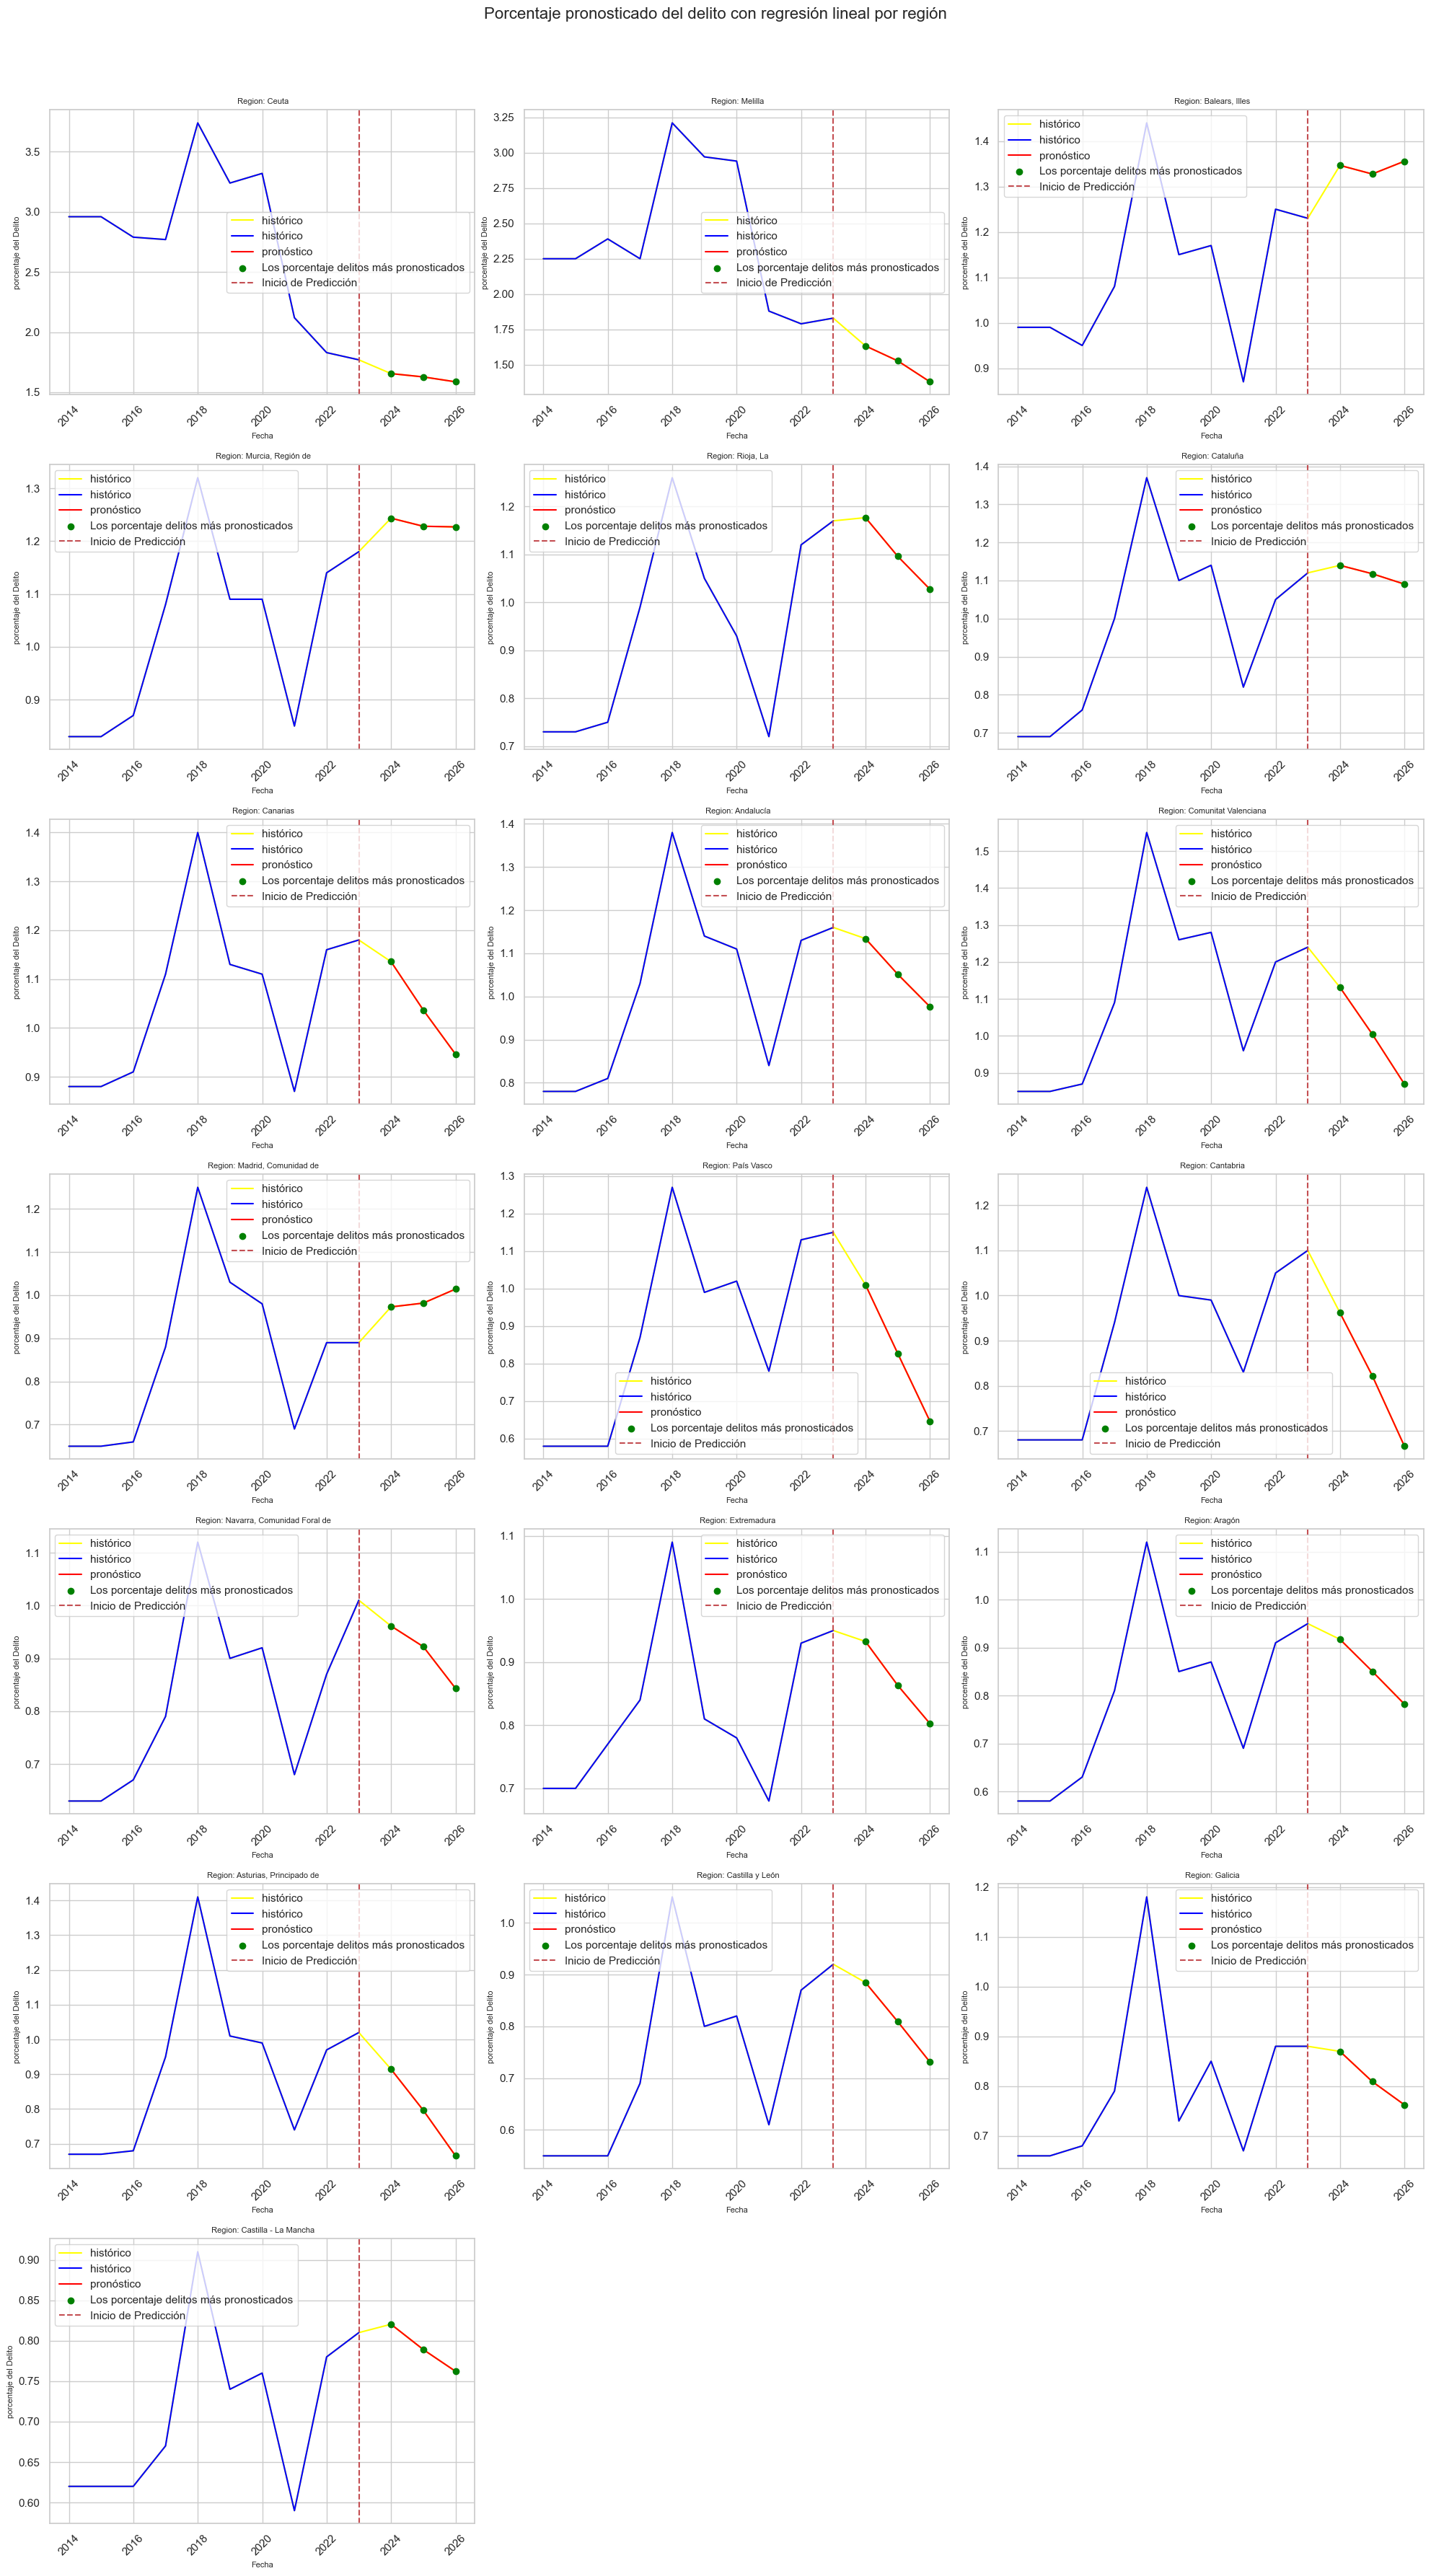

In [137]:
# Calcular las dimensiones de la cuadrícula
num_combinations = len(top_19_combinations)
num_rows = (num_combinations + 2) // 3  
num_cols = 3

fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))
fig.subplots_adjust(hspace=0.5, wspace=0.3)  
fig.suptitle('Porcentaje pronosticado del delito con regresión lineal por región', fontsize=16, y=1.02)
axs = axs.flatten()
for i, combination in enumerate(top_19_combinations):
    region = combination
    df_current = final_pred_df_linreg[ (final_pred_df_linreg['Region'] == region) ]
    latest_date = df_filtered_summ['ds'].max()
    historical_data = df_current[df_current['ds']<= latest_date]
    forecasted_data = df_current[df_current['ds'] > latest_date]
    
    axs[i].plot(df_current['ds'], df_current['y'], label='histórico', color='yellow')
    axs[i].plot(historical_data['ds'], historical_data['y'], label='histórico', color='blue')
    axs[i].plot(forecasted_data['ds'], forecasted_data['y'], label='pronóstico', color='red')

    # Destacar los 10 principales valores previstos en este segmento
    top_forecasted = forecasted_data.nlargest(10, 'y')
    axs[i].scatter(top_forecasted['ds'], top_forecasted['y'], color='green', zorder=5, label='Los porcentaje delitos más pronosticados')


    axs[i].set_title(f" Region: {region}", fontsize=8)
    axs[i].set_xlabel('Fecha', fontsize=8)
    axs[i].axvline(x=pd.to_datetime('2023-01-01'), color='r', linestyle='--', label='Inicio de Predicción')
    axs[i].set_ylabel('porcentaje del Delito', fontsize=8)
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].legend()
# Desactivar los ejes de las subtramas restantes
for j in range(i + 1, num_rows * num_cols):
    axs[j].axis('off')
    
plt.tight_layout()
plt.show()

In [157]:
#Veamos ahora un modelo ARIMA separado para cada región
# Las variables exógenas se excluyen al no converger la optimización de máxima verosimilitud.

In [138]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Cargar el conjunto de datos
df_seperate_arima = df_filtered_summ

# Preparar la estructura de datos para albergar modelos
models = {}



for region in df_seperate_arima['region_encoded'].unique():
            # Filtrar el conjunto de datos para cada combinación de "Tipo de delito", "Edad" y "Región".
    df_filt = df_seperate_arima[ (df_seperate_arima['region_encoded'] == region)]
            # Comprueba si hay datos suficientes
    if len(df_filt) > 3:  # Ajuste este umbral según sea necesario
        df_filt.index = df_filt['ds']
        df_filt.index.freq = 'Y'
        ts = df_filt['y']
        
                # Pruebe a ajustar el modelo ARIMA
        try:
            ex_features = pd.DataFrame({
                'perc_pobreza': df_filt['perc_pobreza'],
                'Analfabetos': df_filt['Analfabetos'],
                'Educación_superior':df_filt['Educación_superior'],
                'Escuela_Profesional':	df_filt['Escuela_Profesional'],
                'Licenciado':df_filt['Licenciado'],
            })
            model = ARIMA(ts, order=(1, 2, 0),exog=ex_features)  # Adjust order based on your data
            fitted_model = model.fit(method_kwargs={'maxiter':1000})

            # Almacenar el modelo ajustado
            models[region] = fitted_model

            # Hacer predicciones
            predictions = fitted_model.predict(start=len(train), end=len(ts)-1, exog=exog_test)

            # Calcular medidas de error
            mae = mean_absolute_error(test, predictions)
            mse = mean_squared_error(test, predictions)
            rmse = np.sqrt(mse)

            # Almacenar errores
            errors[region] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse}

                    # Almacenar el modelo ajustado
            models[region] = fitted_model
        except Exception as e:
            print(f"La adaptación del modelo falló para el Region: {region} con error: {e}")
    else:
        print(f"No hay suficientes datos para el Region: {region}")

# Mostrar los errores

print(f"  MAE: {error['MAE']}")
print(f"  MSE: {error['MSE']}")
print(f"  RMSE: {error['RMSE']}")


  MAE: 0.2285581664687194
  MSE: 0.06835973438894928
  RMSE: 0.2614569455741218


In [139]:
print(fitted_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(1, 2, 0)   Log Likelihood                  15.980
Date:                Thu, 06 Jun 2024   AIC                            -17.961
Time:                        18:10:09   BIC                            -17.404
Sample:                    12-31-2013   HQIC                           -21.711
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
perc_pobreza            0.0031      0.007      0.412      0.681      -0.012       0.018
Analfabetos             1.3565      0.087     15.575      0.000       1.186       1.527
Educación_superi

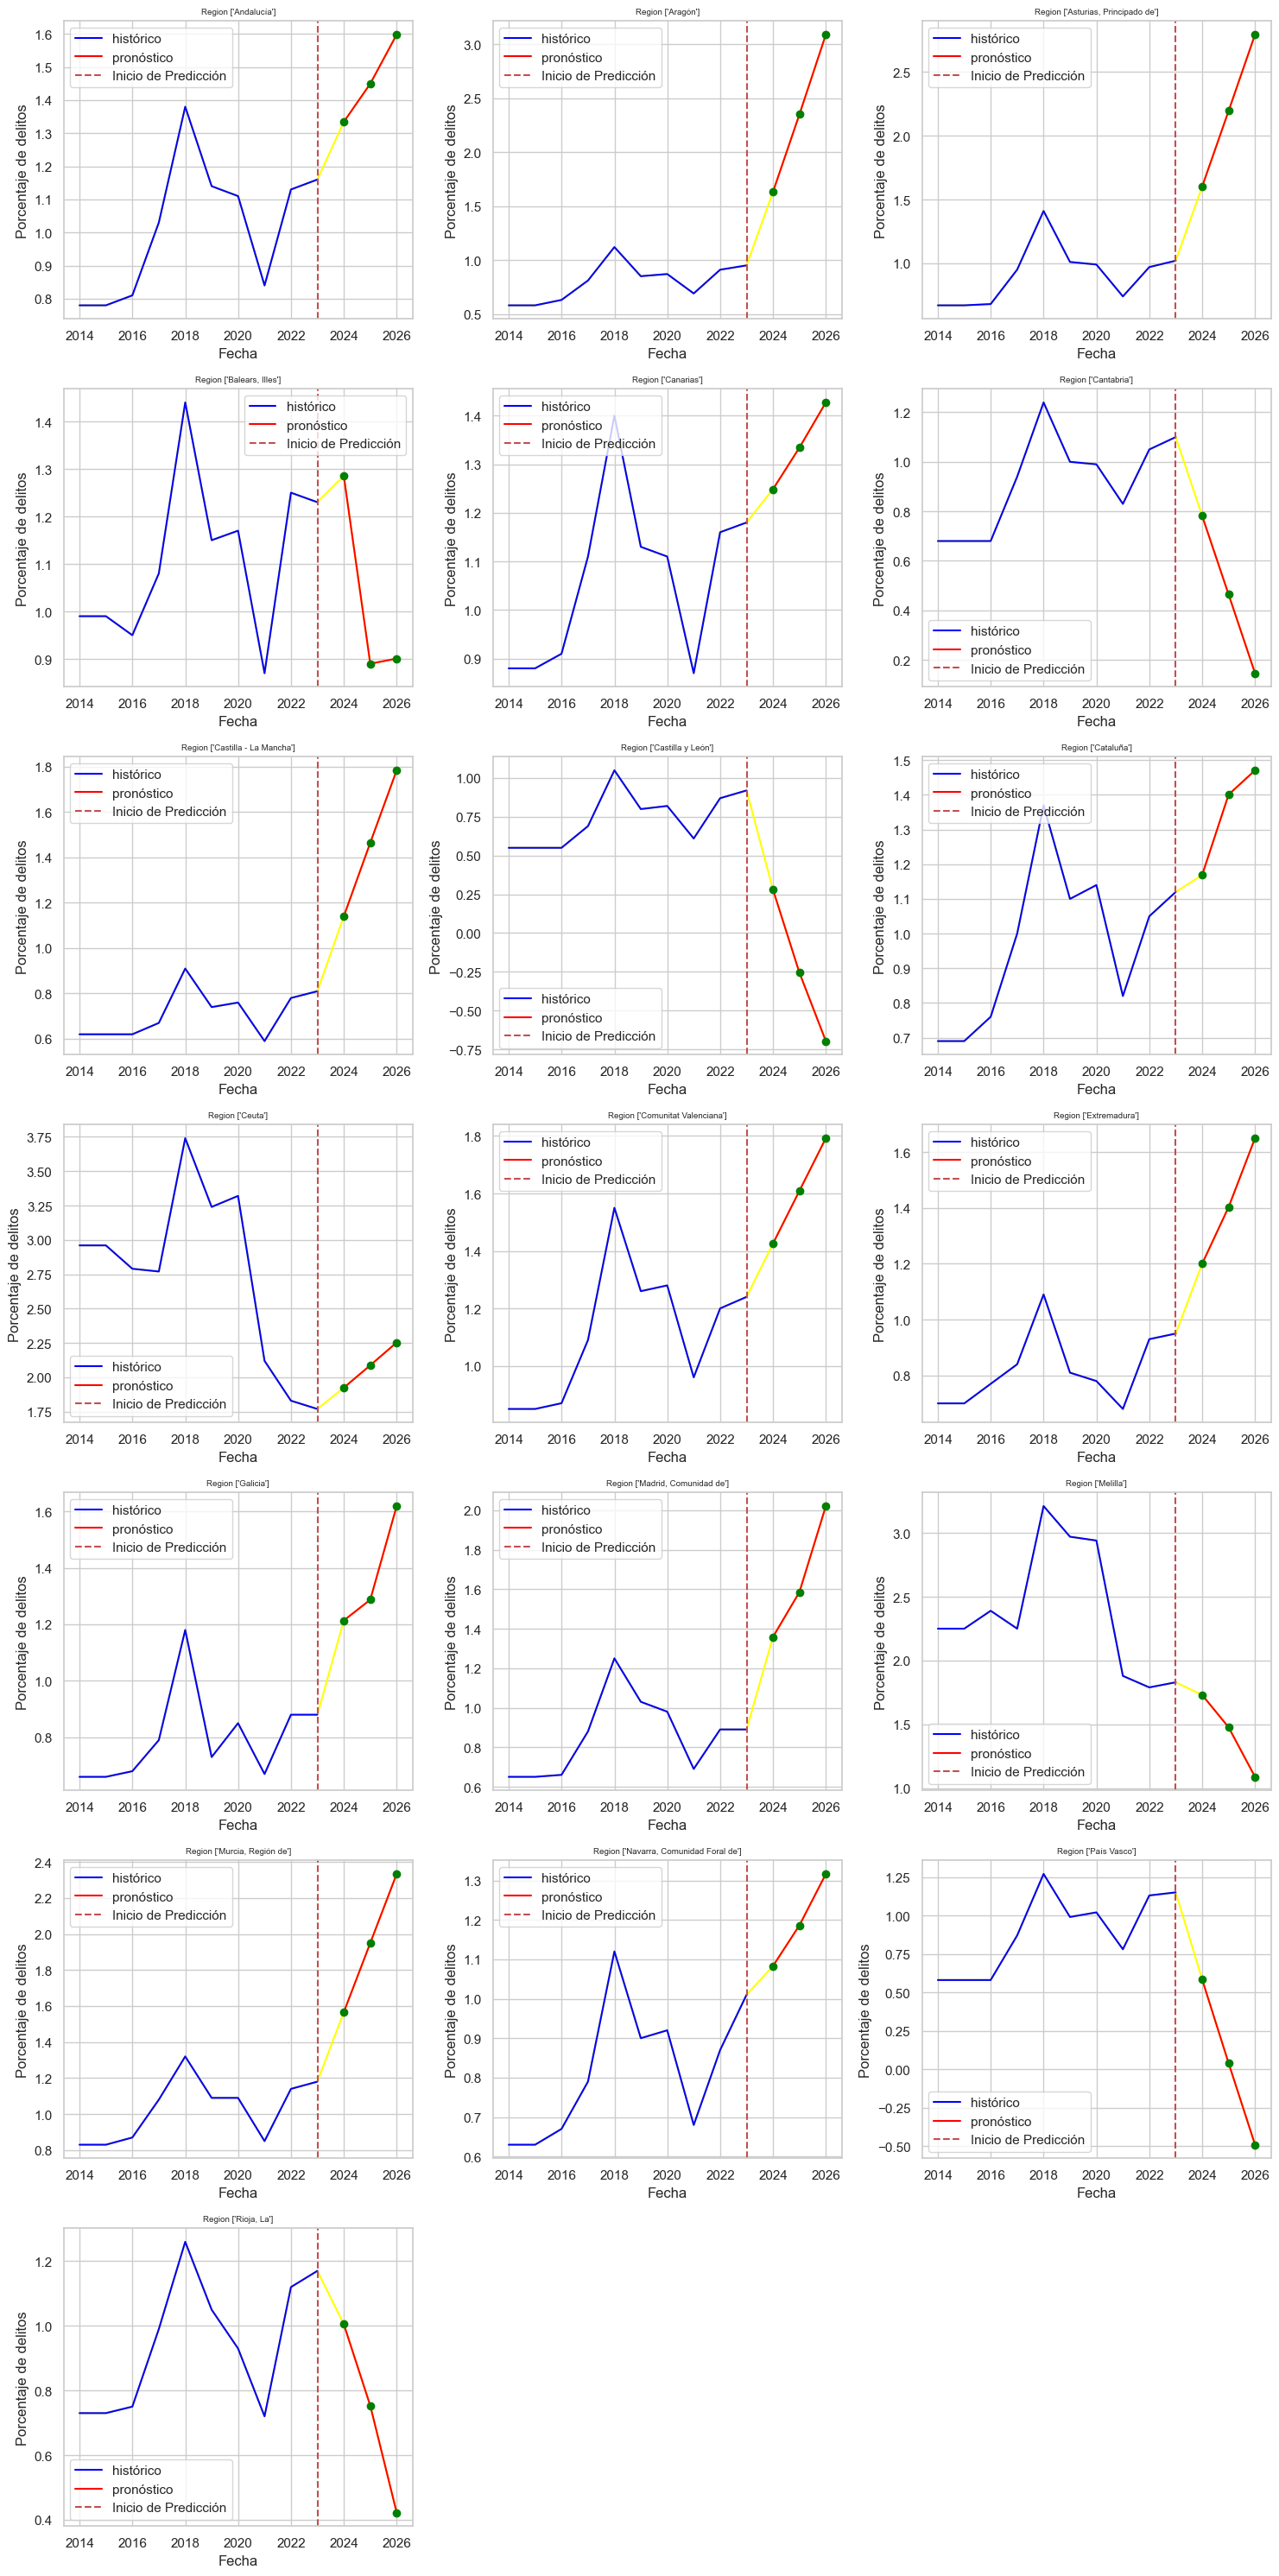

In [140]:

import numpy as np
from datetime import datetime, timedelta

pronóstico_end = pd.to_datetime('2025-12-31')
steps =3
last_date = ''
combined_data = {}

for region in models:
            # Seleccione los datos históricos pertinentes
    historical_data = df_seperate_arima[ (df_seperate_arima['region_encoded'] == region)
            ]
    historical_data = historical_data.sort_values(by='ds', ascending=True)
    last_row = historical_data.iloc[[-1]][[  'perc_pobreza',    'Analfabetos',  'Educación_superior', 'Escuela_Profesional','Licenciado']]
    future_exog = pd.concat([last_row] * steps, ignore_index=True)
            # Forecast
    last_date = historical_data['ds'].max()
    steps = (pronóstico_end.year - last_date.year) 
    forecast = models[region].forecast(steps=steps,exog=future_exog)
            
    forecast_dates = pd.date_range(start=last_date +  timedelta(days=365), periods=len(forecast), freq='A')
    forecast_df = pd.DataFrame({
                'ds': forecast_dates, 
                'y': forecast, 
                'region_encoded': region
            })
            
            # Combinar datos históricos y previsiones
    combined_df = pd.concat([historical_data, forecast_df], ignore_index=True)
    combined_data[region] = combined_df

plot_limit = 21
plot_count = 0

# Determinar la disposición de los subplots
nrows = 7 
ncols = 3  

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 30))  # Adjust the figsize as needed
fig.tight_layout(pad=6.0)


for region in combined_data:
    if plot_count >= plot_limit: break
   # Plot datos históricos y futuros      
    ax = axes[plot_count // ncols, plot_count % ncols]
    combined_df = combined_data[region]
    historical_data =  combined_df[combined_df['ds']<= last_date]
    future_data = combined_df[combined_df['ds']> last_date]
    ax.plot(combined_df['ds'], combined_df['y'],  color='yellow')
    ax.scatter(future_data['ds'], future_data['y'], color='green', zorder=5)
    ax.plot(historical_data['ds'], historical_data['y'], label='histórico', color='blue')
    ax.plot(future_data['ds'], future_data['y'], label='pronóstico', color='red')
    ax.axvline(x=pd.to_datetime('2023-01-01'), color='r', linestyle='--', label='Inicio de Predicción')

    #ax.plot(combined_df['ds'], combined_df['y'], label='Histórico', color='blue')   
    #forecast_df = combined_df[combined_df['ds'] > last_date]
    #ax.plot(forecast_df['ds'], forecast_df['y'], label='Pronóstico', color='red', linestyle='--')
    ax.set_title(f"Region {loaded_region_encoder.inverse_transform([region])}",fontsize=7)
    ax.set_xlabel('Fecha')
    ax.set_ylabel('Porcentaje de delitos')
    ax.legend(loc='best')
            
    plot_count += 1

# Ajustar los subplots no utilizados 
for i in range(plot_count, nrows * ncols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()